# 💼🔮 Lending Club Loan Default Prediction

## 🎪 Introduction
The advent of the digital age has revolutionized the financial industry, with fintech startups like Lending Club leading the way in democratizing access to credit. Lending Club, an online peer-to-peer lending platform, has made a significant impact by connecting borrowers who may be underserved by traditional banking institutions with investors looking for alternative investment avenues. However, this new frontier of lending is not without its risks - loan defaults. This project aims to develop a predictive model to estimate the likelihood of loan defaults, providing a more secure and profitable environment for all parties involved.

## 🌐 Understanding of Business
From an economist's perspective, Lending Club's model is an innovative solution to credit market imperfections, often filling gaps left by traditional banks and financial institutions. By using a wealth of data points - personal details, credit history, loan purpose, and more - Lending Club seeks to accurately assess the creditworthiness of loan applicants, a critical aspect in mitigating the risk of loan defaults.

## ⚙️ Business Objectives
This project aims to further enhance Lending Club's risk assessment process and contribute to the overall sustainability of the peer-to-peer lending industry. The specific goals are:

1. 🎛️ Devise a robust machine learning model to predict the likelihood of loan default.
2. 🎯 Pinpoint the key factors precipitating loan defaults.
3. 💡 Impart actionable insights to fine-tune Lending Club's risk assessment process.
4. 📈 Ultimately, trim down the number of loan defaults, bolster investor confidence, and boost the platform's profitability.

By achieving these objectives, we can help Lending Club create a more balanced financial ecosystem where credit is accessible, risks are managed effectively, and profitability is maintained. This aligns with the broader economic goal of financial inclusion and stability in the lending market.

In [1]:
import pandas as pd
import random
import numpy as np

#visual library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# importing Lending club data from csv file
loan_data = pd.read_csv("loan_data.csv",index_col=0)

## Feature Description

|    | LoanStatNew          | Description                                                                                                                                                                                              |
|---:|:---------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | addr_state           | The state provided by the borrower in the loan application                                                                                                                                               |
|  1 | annual_inc           | The self-reported annual income provided by the borrower during registration.                                                                                                                            |
|  2 | application_type     | Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                     |
|  3 | dti                  | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
|  4 | earliest_cr_line     | The month the borrower's earliest reported credit line was opened                                                                                                                                        |
|  5 | emp_length           | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                        |
|  6 | emp_title            | The job title supplied by the Borrower when applying for the loan.*                                                                                                                                      |
|  7 | fico_range_high      | The upper boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                             |
|  8 | fico_range_low       | The lower boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                             |
|  9 | funded_amnt          | The total amount committed to that loan at that point in time.                                                                                                                                           |
| 10 | funded_amnt_inv      | The total amount committed by investors for that loan at that point in time.                                                                                                                             |
| 11 | grade                | LC assigned loan grade                                                                                                                                                                                   |
| 12 | home_ownership       | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER                                                    |
| 13 | id                   | A unique LC assigned ID for the loan listing.                                                                                                                                                            |
| 14 | initial_list_status  | The initial listing status of the loan. Possible values are – W, F                                                                                                                                       |
| 15 | installment          | The monthly payment owed by the borrower if the loan originates.                                                                                                                                         |
| 16 | int_rate             | Interest Rate on the loan                                                                                                                                                                                |
| 17 | issue_d              | The month which the loan was funded                                                                                                                                                                      |
| 18 | loan_amnt            | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                             |
| 19 | loan_status          | Current status of the loan                                                                                                                                                                               |
| 20 | mort_acc             | Number of mortgage accounts.                                                                                                                                                                             |
| 21 | open_acc             | The number of open credit lines in the borrower's credit file.                                                                                                                                           |
| 22 | pub_rec_bankruptcies | Number of public record bankruptcies                                                                                                                                                                     |
| 23 | purpose              | A category provided by the borrower for the loan request.                                                                                                                                                |
| 24 | revol_bal            | Total credit revolving balance                                                                                                                                                                           |
| 25 | revol_util           | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                               |
| 26 | sub_grade            | LC assigned loan subgrade                                                                                                                                                                                |
| 27 | term                 | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                                                     |
| 28 | title                | The loan title provided by the borrower                                                                                                                                                                  |
| 29 | total_acc            | The total number of credit lines currently in the borrower's credit file                                                                                                                                 |
| 30 | verification_status  | Indicates if income was verified by LC, not verified, or if the income source was verified                                                                                                               |
| 31 | zip_code             | The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                    |

In [3]:
loan_data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345350 entries, 0 to 2260697
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1345350 non-null  int64  
 1   loan_amnt             1345350 non-null  float64
 2   funded_amnt_inv       1345350 non-null  float64
 3   funded_amnt           1345350 non-null  float64
 4   term                  1345350 non-null  object 
 5   int_rate              1345350 non-null  float64
 6   installment           1345350 non-null  float64
 7   grade                 1345350 non-null  object 
 8   sub_grade             1345350 non-null  object 
 9   emp_title             1259559 non-null  object 
 10  emp_length            1266834 non-null  object 
 11  fico_range_high       1345350 non-null  float64
 12  fico_range_low        1345350 non-null  float64
 13  home_ownership        1345350 non-null  object 
 14  annual_inc            1345350 non-

- since the memorey usage is huge lets down cast the variables 

In [4]:
## peeking at df
loan_data.head()

id  loan_amnt  funded_amnt_inv  funded_amnt        term  int_rate  \
0  68407277     3600.0           3600.0       3600.0   36 months     13.99   
1  68355089    24700.0          24700.0      24700.0   36 months     11.99   
2  68341763    20000.0          20000.0      20000.0   60 months     10.78   
4  68476807    10400.0          10400.0      10400.0   60 months     22.45   
5  68426831    11950.0          11950.0      11950.0   36 months     13.44   

   installment grade sub_grade             emp_title emp_length  \
0       123.03     C        C4               leadman  10+ years   
1       820.28     C        C1              Engineer  10+ years   
2       432.66     B        B4          truck driver  10+ years   
4       289.91     F        F1   Contract Specialist    3 years   
5       405.18     C        C3  Veterinary Tecnician    4 years   

   fico_range_high  fico_range_low home_ownership  annual_inc  \
0            679.0           675.0       MORTGAGE     55000.0   
1            719.0           715.0       MORTGAGE     65000.0   
2            699.0           695.0       MORTGAGE     63000.0   
4            699.0           695.0       MORTGAGE    104433.0   
5            694.0           690.0           RENT     34000.0   

  verification_status   issue_d loan_status             purpose  \
0        Not Verified  Dec-2015  Fully Paid  debt_consolidation   
1        Not Verified  Dec-2015  Fully Paid      small_business   
2        Not Verified  Dec-2015  Fully Paid    home_improvement   
4     Source Verified  Dec-2015  Fully Paid      major_purchase   
5     Source Verified  Dec-2015  Fully Paid  debt_consolidation   

                title zip_code addr_state    dti earliest_cr_line  open_acc  \
0  Debt consolidation    190xx         PA   5.91         Aug-2003       7.0   
1            Business    577xx         SD  16.06         Dec-1999      22.0   
2                 NaN    605xx         IL  10.78         Aug-2000       6.0   
4      Major purchase    174xx         PA  25.37         Jun-1998      12.0   
5  Debt consolidation    300xx         GA  10.20         Oct-1987       5.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0     2765.0        29.7       13.0                   w       Individual   
1    21470.0        19.2       38.0                   w       Individual   
2     7869.0        56.2       18.0                   w        Joint App   
4    21929.0        64.5       35.0                   w       Individual   
5     8822.0        68.4        6.0                   w       Individual   

   mort_acc  pub_rec_bankruptcies  
0       1.0                   0.0  
1       4.0                   0.0  
2       5.0                   0.0  
4       6.0                   0.0  
5       0.0                   0.0

In [5]:
### dowcasting to save memory
def convert_columns_to_catg(df, column_list):
    for col in column_list:
        print("converting", col.ljust(30), "size: ", round(df[col].memory_usage(deep=True)*1e-6,2), end="\t")
        df[col] = df[col].astype("category")
        print("->\t", round(df[col].memory_usage(deep=True)*1e-6,2))

In [6]:
convert_columns_to_catg(loan_data, ['grade','sub_grade','emp_title','home_ownership','verification_status','loan_status',
                                   'purpose','title','zip_code','addr_state','initial_list_status','application_type','emp_length'])

converting grade                          size:  88.79	->	 12.11
converting sub_grade                      size:  90.14	->	 12.11
converting emp_title                      size:  105.2	->	 53.98
converting home_ownership                 size:  95.35	->	 12.11
converting verification_status            size:  103.48	->	 12.11
converting loan_status                    size:  101.17	->	 12.11
converting purpose                        size:  107.51	->	 12.11
converting title                          size:  110.41	->	 22.96
converting zip_code                       size:  94.17	->	 13.55
converting addr_state                     size:  90.14	->	 12.11
converting initial_list_status            size:  88.79	->	 12.11
converting application_type               size:  100.88	->	 12.11
converting emp_length                     size:  95.26	->	 12.11


In [7]:
import gc

def downcast_df_float_columns(df):
    list_of_columns = list(df.select_dtypes(include=["float64"]).columns)
        
    if len(list_of_columns)>=1:
        max_string_length = max([len(col) for col in list_of_columns]) # finds max string length for better status printing
        print("downcasting float for:", list_of_columns, "\n")
        
        for col in list_of_columns:
            print("reduced memory usage for:  ", col.ljust(max_string_length+2)[:max_string_length+2],
                  "from", str(round(df[col].memory_usage(deep=True)*1e-6,2)).rjust(8), "to", end=" ")
            df[col] = pd.to_numeric(df[col], downcast="float")
            print(str(round(df[col].memory_usage(deep=True)*1e-6,2)).rjust(8))
    else:
        print("no columns to downcast")
    
    gc.collect()
    
    print("done")

In [8]:
downcast_df_float_columns(loan_data)

downcasting float for: ['loan_amnt', 'funded_amnt_inv', 'funded_amnt', 'int_rate', 'installment', 'fico_range_high', 'fico_range_low', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'] 

reduced memory usage for:   loan_amnt              from    21.53 to    16.14
reduced memory usage for:   funded_amnt_inv        from    21.53 to    21.53
reduced memory usage for:   funded_amnt            from    21.53 to    16.14
reduced memory usage for:   int_rate               from    21.53 to    16.14
reduced memory usage for:   installment            from    21.53 to    16.14
reduced memory usage for:   fico_range_high        from    21.53 to    16.14
reduced memory usage for:   fico_range_low         from    21.53 to    16.14
reduced memory usage for:   annual_inc             from    21.53 to    21.53
reduced memory usage for:   dti                    from    21.53 to    16.14
reduced memory usage for:   open_acc               from    21

In [9]:
loan_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345350 entries, 0 to 2260697
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1345350 non-null  int64   
 1   loan_amnt             1345350 non-null  float32 
 2   funded_amnt_inv       1345350 non-null  float64 
 3   funded_amnt           1345350 non-null  float32 
 4   term                  1345350 non-null  object  
 5   int_rate              1345350 non-null  float32 
 6   installment           1345350 non-null  float32 
 7   grade                 1345350 non-null  category
 8   sub_grade             1345350 non-null  category
 9   emp_title             1259559 non-null  category
 10  emp_length            1266834 non-null  category
 11  fico_range_high       1345350 non-null  float32 
 12  fico_range_low        1345350 non-null  float32 
 13  home_ownership        1345350 non-null  category
 14  annual_inc        

- we can see that after down casting the variables the data memory usage reduced

In [10]:
loan_data.describe()

id     loan_amnt  funded_amnt_inv   funded_amnt  \
count  1.345350e+06  1.345350e+06     1.345350e+06  1.345350e+06   
mean   5.634650e+07  1.441997e+04     1.438914e+04  1.441155e+04   
std    3.836175e+07  8.717099e+03     8.715542e+03  8.713166e+03   
min    5.473400e+04  5.000000e+02     0.000000e+00  5.000000e+02   
25%    2.002788e+07  8.000000e+03     7.875000e+03  8.000000e+03   
50%    5.773490e+07  1.200000e+04     1.200000e+04  1.200000e+04   
75%    8.454656e+07  2.000000e+04     2.000000e+04  2.000000e+04   
max    1.456364e+08  4.000000e+04     4.000000e+04  4.000000e+04   

           int_rate   installment  fico_range_high  fico_range_low  \
count  1.345350e+06  1.345350e+06     1.345350e+06    1.345350e+06   
mean   1.323971e+01  4.380755e+02     7.001852e+02    6.961851e+02   
std    4.768782e+00  2.615145e+02     3.185345e+01    3.185280e+01   
min    5.310000e+00  4.930000e+00     6.290000e+02    6.250000e+02   
25%    9.750000e+00  2.484800e+02     6.740000e+02    6.700000e+02   
50%    1.274000e+01  3.754300e+02     6.940000e+02    6.900000e+02   
75%    1.599000e+01  5.807300e+02     7.140000e+02    7.100000e+02   
max    3.099000e+01  1.719830e+03     8.500000e+02    8.450000e+02   

         annual_inc           dti      open_acc     revol_bal    revol_util  \
count  1.345350e+06  1.344976e+06  1.345350e+06  1.345350e+06  1.344493e+06   
mean   7.624757e+04  1.828263e+01  1.159351e+01  1.624796e+04  5.180978e+01   
std    6.992485e+04  1.116041e+01  5.473848e+00  2.232791e+04  2.452110e+01   
min    0.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.578000e+04  1.179000e+01  8.000000e+00  5.943000e+03  3.340000e+01   
50%    6.500000e+04  1.761000e+01  1.100000e+01  1.113400e+04  5.220000e+01   
75%    9.000000e+04  2.406000e+01  1.400000e+01  1.975500e+04  7.070000e+01   
max    1.099920e+07  9.990000e+02  9.000000e+01  2.904836e+06  8.923000e+02   

          total_acc      mort_acc  pub_rec_bankruptcies  
count  1.345350e+06  1.298069e+06          1.344653e+06  
mean   2.498075e+01  1.670769e+00          1.344444e-01  
std    1.199852e+01  2.000441e+00          3.779280e-01  
min    2.000000e+00  0.000000e+00          0.000000e+00  
25%    1.600000e+01  0.000000e+00          0.000000e+00  
50%    2.300000e+01  1.000000e+00          0.000000e+00  
75%    3.200000e+01  3.000000e+00          0.000000e+00  
max    1.760000e+02  5.100000e+01          1.200000e+01

In [11]:
## checking for missing values
# function to show percentage of null values-
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [12]:
## checking for null values

null_df = null_values(loan_data)
print(null_df)
del null_df
gc.collect

Dataframe has 32 columns.
There are 8 columns that have missing values.
                      Missing Values  % of Total Values
emp_title                      85791                6.4
emp_length                     78516                5.8
mort_acc                       47281                3.5
title                          16659                1.2
revol_util                       857                0.1
pub_rec_bankruptcies             697                0.1
dti                              374                0.0
zip_code                           1                0.0


<function gc.collect(generation=2)>

In [13]:
gc.collect()

26

In [14]:
#Function that will return the value count and frequency of each observation within a feature.

# this function will later be used for visualization.
def value_count_norm_cal(df,feature):
    value_count = df[feature].value_counts()
    value_count_norm = df[feature].value_counts(normalize=True) * 100
    value_count_concat = pd.concat([value_count, value_count_norm], axis=1)
    value_count_concat.columns = ['Count', 'Frequency (%)']
    return value_count_concat

In [15]:
#generating target columns

loan_data["loan_status"] = loan_data["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)

gc.collect()

0

In [16]:
#function to explore features
def feature_exploration (df,feature,numeric):
    if numeric :
            print('Description:\n{}'.format((np.abs(df[feature])).describe()))
            print('*'*50)
            print('Object type:{}'.format(df[feature].dtype))
    else:
        print('Description:\n{}'.format(df[feature].describe()))
        print('*'*50)
        print('Object type:\n{}'.format(df[feature].dtype))
        print('*'*50)
        value_cnt = value_count_norm_cal(df,feature)
        print('Value count:\n{}'.format(value_cnt))
# Default rates vs. categorical columns
def Cat_col_vs_default_rate(df, col_name, feature, title):
    default_rates = df.groupby(col_name)[feature].value_counts(dropna=True, normalize=True).round(2).loc[:, 0]
    categories = np.unique(df[col_name])
    colors = plt.cm.get_cmap('Set2', len(categories))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(default_rates.index, default_rates.values, color=colors(range(len(default_rates))))
    
    ax.set_xlabel(col_name)
    ax.set_ylabel('Default Rates (%)')
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(np.arange(len(default_rates)), minor=False)
    ax.set_xticklabels(default_rates.index, minor=False, rotation=90)
    
    plt.tight_layout()
    plt.show()
# Box plot function
def box_plot(df, feature):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=df[feature], ax=ax, color='blue', linewidth=1)
    ax.set_xlabel(feature)
    ax.set_title('{} Distribution (Boxplot)'.format(feature))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

# Pie chart function
def pie_plot(df, feature, title):
    pie_df = df[feature].value_counts(normalize=True)
    colors = plt.cm.get_cmap('Set3', len(pie_df))
    
    fig, ax = plt.subplots()
    ax.pie(pie_df.values, labels=pie_df.index, autopct='%1.1f%%', colors=colors(range(len(pie_df))))
    ax.set_title(title)
    ax.axis('equal')
    
    plt.tight_layout()
    plt.show()
    
# Distribution plot function
def dist_plot(df, feature):
    loan_statuses = df['loan_status'].unique()
    f, (ax1, ax2) = plt.subplots(figsize=(11, 7), nrows=2, ncols=1, gridspec_kw={'height_ratios': [2, 1]})
    sns.set_theme(style="darkgrid")

    # Plot histogram
    sns.histplot(df[feature], kde=False, ax=ax1)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    ax1.set_title('{} Distribution (Histogram)'.format(feature))
    
    # Plot box plots against loan status (horizontal)
    sns.boxplot(x=df[feature], 
y=df['loan_status'], orient='h', ax=ax2)
    
    ax2.set(xlabel=feature, ylabel='Loan Status')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_yticklabels(loan_statuses)
    
    plt.tight_layout()
    plt.show()

    ###
def log_dist_plot(df, feature):
    loan_statuses = df['loan_status'].unique()
    f, (ax1, ax2) = plt.subplots(figsize=(11, 7), nrows=2, ncols=1, gridspec_kw={'height_ratios': [2, 1]})
    sns.set_theme(style="darkgrid")

    # Apply log transformation (log1p) to the feature
    transformed_feature = np.log1p(df[feature])

    # Plot histogram of the log-transformed feature
    sns.histplot(transformed_feature, kde=False, ax=ax1)
    ax1.set_xlabel('Logarithm of (1 + {})'.format(feature))
    ax1.set_ylabel('Count')
    ax1.set_title('{} Distribution (Histogram)'.format(feature))

    # Plot box plots against loan status (horizontal) using the log-transformed feature
    sns.boxplot(x=transformed_feature, y=df['loan_status'], orient='h', ax=ax2)

    ax2.set(xlabel='Logarithm of (1 + {})'.format(feature), ylabel='Loan Status')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_yticklabels(loan_statuses)

    plt.tight_layout()
    plt.show()

# Count plot functions
def count_in_order_plot(df, feature, title, order):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette('pastel')[:len(order)]
    sns.countplot(data=df, x=feature, order=order, palette=colors)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def count_plot(df, feature, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette('pastel')[:len(df[feature].unique())]
    sns.countplot(data=df, x=feature, palette=colors)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Univariate analysis

### loan_status

In [17]:
feature_exploration (loan_data,'loan_status',numeric = False)

Description:
count    1.345350e+06
mean     8.003501e-01
std      3.997373e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: loan_status, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
     Count  Frequency (%)
1  1076751      80.035009
0   268599      19.964991


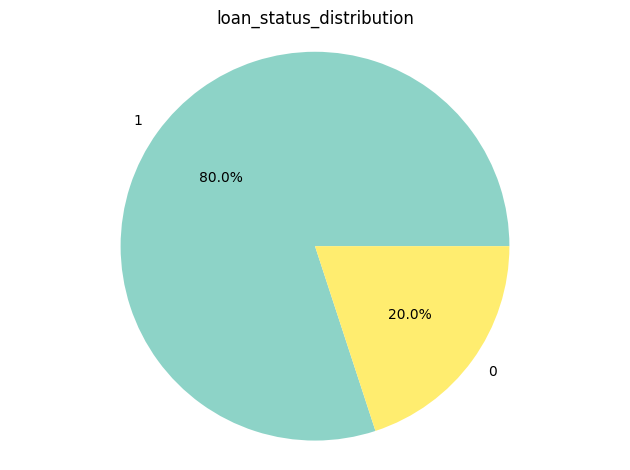

In [18]:
pie_plot (loan_data,'loan_status','loan_status_distribution')

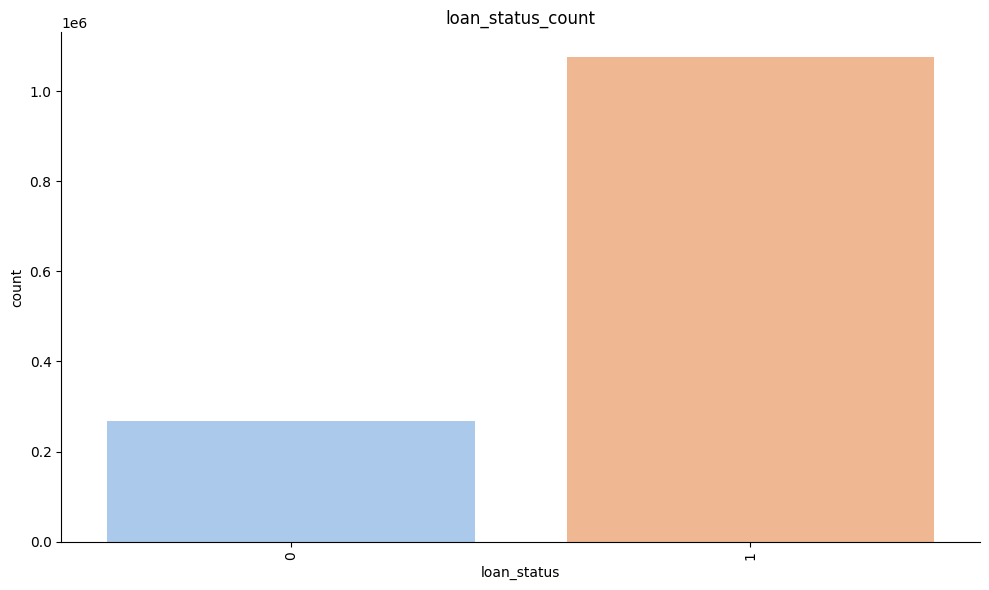

In [19]:
count_plot (loan_data,"loan_status","loan_status_count") 

* data set is imballanced 


### ID

In [20]:
#Checking for Uniqueness: Verifying the Distinctness of Values
print(loan_data['id'].describe())
print('*'*50)
print('Unique variables:',loan_data['id'].nunique())

count    1.345350e+06
mean     5.634650e+07
std      3.836175e+07
min      5.473400e+04
25%      2.002788e+07
50%      5.773490e+07
75%      8.454656e+07
max      1.456364e+08
Name: id, dtype: float64
**************************************************
Unique variables: 1345350


* They are all distinctive, yes. We exclude the ID since it is not useful for modelling, either as a categorical variable (there are too many distinct values) or a numerical variable (the magnitudes of the IDs vary greatly, probably without any importance).

### Loan_amnt , Funded ,Invested

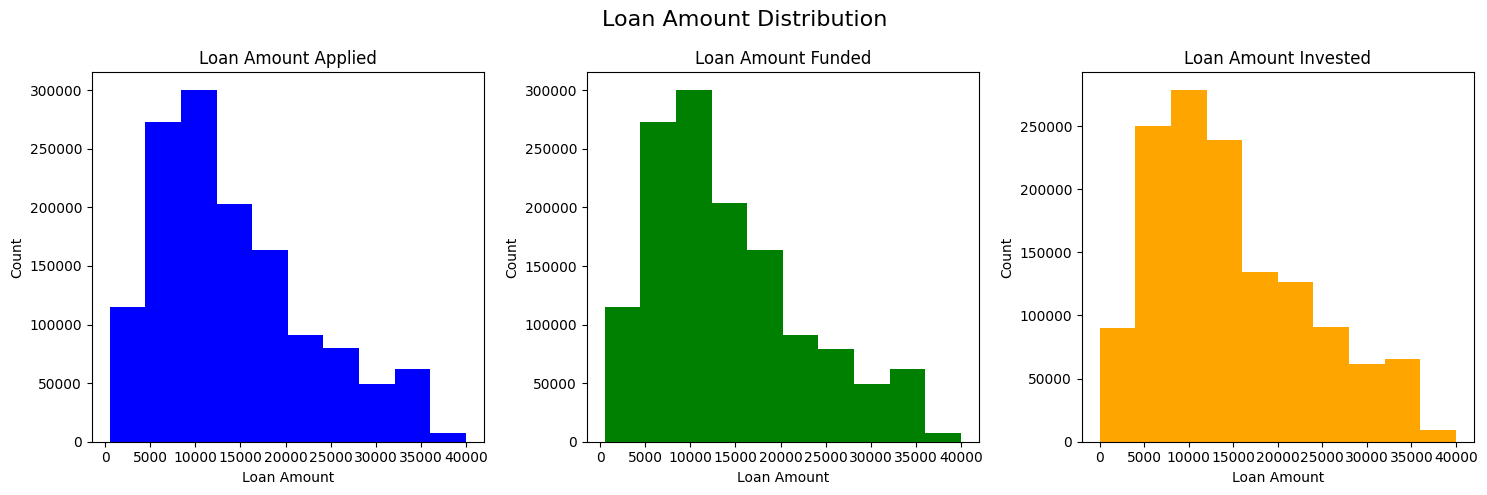

In [21]:
# Checking distribution of loan_amount
loan_amount = loan_data["loan_amnt"].values
funded_amount = loan_data["funded_amnt"].values
investor_funds = loan_data["funded_amnt_inv"].values

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Loan Amount Applied
axs[0].hist(loan_amount, color='blue')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Count')
axs[0].set_title('Loan Amount Applied')

# Plot 2: Loan Amount Funded
axs[1].hist(funded_amount, color='green')
axs[1].set_xlabel('Loan Amount')
axs[1].set_ylabel('Count')
axs[1].set_title('Loan Amount Funded')

# Plot 3: Loan Amount Invested
axs[2].hist(investor_funds, color='orange')
axs[2].set_xlabel('Loan Amount')
axs[2].set_ylabel('Count')
axs[2].set_title('Loan Amount Invested')

plt.suptitle('Loan Amount Distribution', fontsize=16)
plt.tight_layout()
plt.show()

* as we can see from the above loan_distribution all of them have similer distribution and vales so only loan_amount will be used.


###  loan term

In [22]:
feature_exploration (loan_data,'term',numeric = False)

Description:
count        1345350
unique             2
top        36 months
freq         1020768
Name: term, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
              Count  Frequency (%)
 36 months  1020768      75.873787
 60 months   324582      24.126213


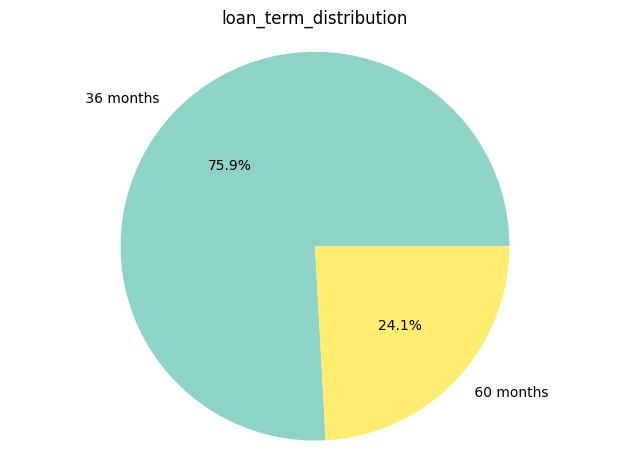

In [23]:
#pipe plot of term distribution
pie_plot (loan_data,"term",title = "loan_term_distribution")

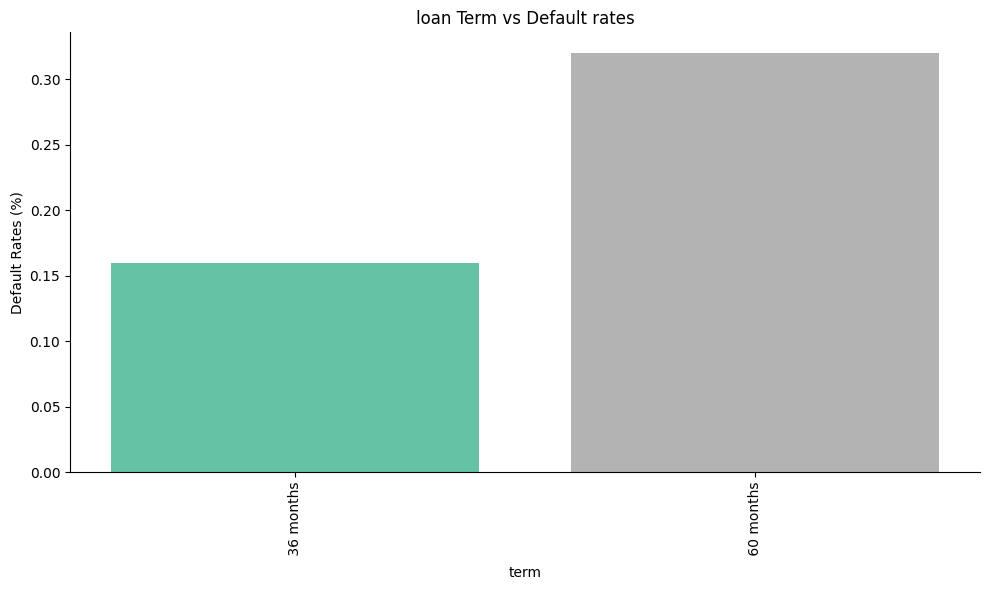

In [24]:
Cat_col_vs_default_rate (loan_data,'term','loan_status','loan Term vs Default rates')

In [25]:
#Converting Terms to Binary: Transforming Categorical Variables into Binary Representation
loan_data["term"] = loan_data["term"].map({" 36 months": 0, " 60 months": 1})
loan_data['term'].head()

0    0
1    0
2    1
4    1
5    0
Name: term, dtype: int64

* (76%)Most loans issued are 36 months long.
* 30 % of 60 montsh are deafults compared 15 % of 36 months loan.
* long term loan has higher risk then short term loan.

### Intrest rate

In [26]:
feature_exploration (loan_data,"int_rate",numeric = True)

Description:
count    1.345350e+06
mean     1.323971e+01
std      4.768782e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64
**************************************************
Object type:float32


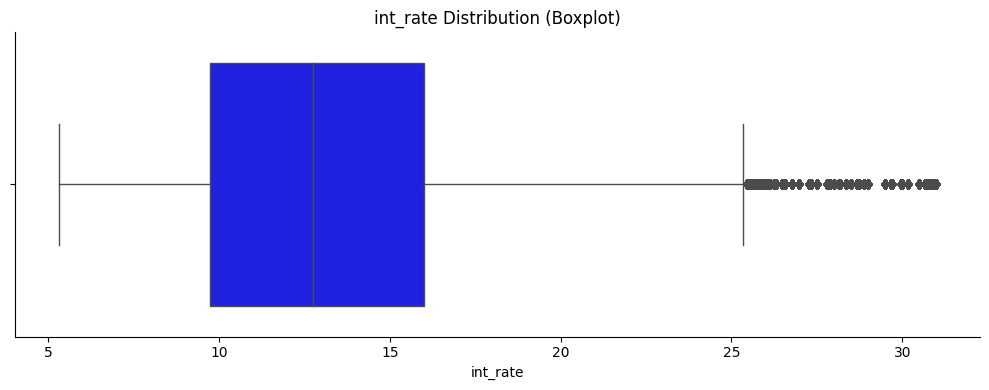

In [27]:
box_plot (loan_data,"int_rate")

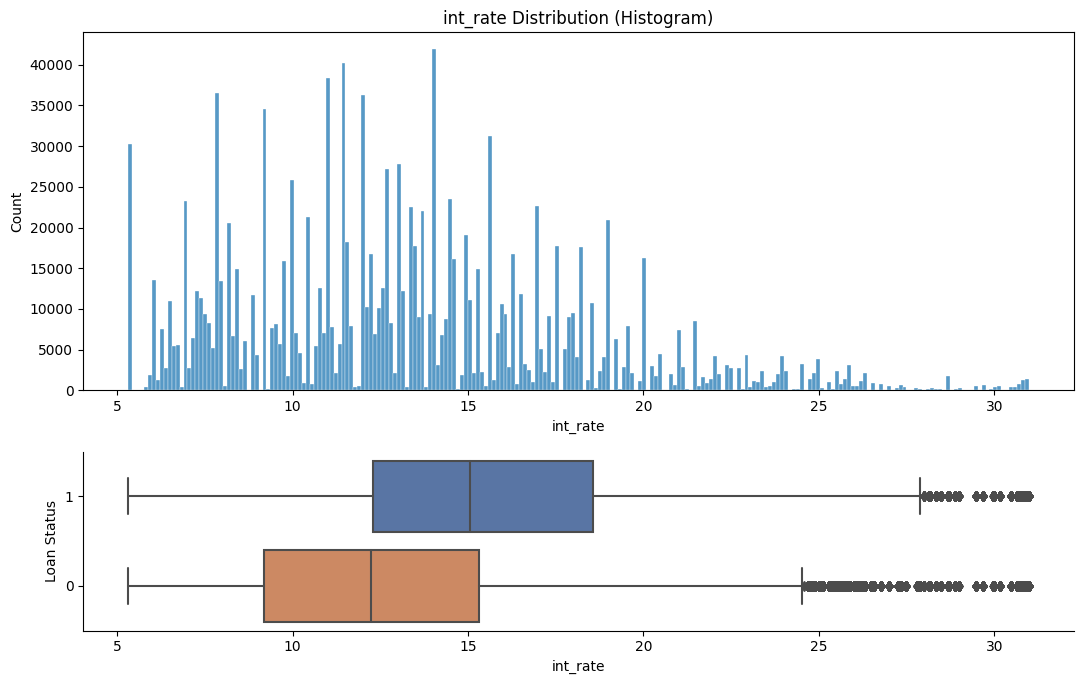

In [28]:
dist_plot (loan_data,'int_rate')

* intrest rate ranges from 5 % to 31 %.
* Default rate tends to increse as intrest rate increses as expected.
* positively skewed.  

### Loan Grade and Sub-grade

In [29]:
print(feature_exploration (loan_data,"grade",numeric = False))

Description:
count     1345350
unique          7
top             B
freq       392748
Name: grade, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
    Count  Frequency (%)
B  392748      29.192998
C  381694      28.371353
A  235095      17.474635
D  200966      14.937823
E   93656       6.961460
F   32059       2.382949
G    9132       0.678782
None


In [30]:
feature_exploration (loan_data,"sub_grade",numeric = False)

Description:
count     1345350
unique         35
top            C1
freq        85496
Name: sub_grade, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
    Count  Frequency (%)
C1  85496       6.354926
B4  83200       6.184264
B5  82541       6.135281
B3  81828       6.082283
C2  79215       5.888059
C3  75000       5.574757
C4  74422       5.531795
B2  74025       5.502286
B1  71154       5.288884
C5  67561       5.021816
A5  64005       4.757498
A4  52236       3.882707
D1  51323       3.814844
D2  44851       3.333779
A1  43679       3.246664
D3  39322       2.922808
A3  37997       2.824321
A2  37178       2.763444
D4  35568       2.643773
D5  29902       2.222619
E1  23749       1.765266
E2  21378       1.589029
E3  18387       1.366708
E4  15723       1.168692
E5  14419       1.071766
F1   9970       0.741071
F2   7198       0.535028
F3   6088       0.452522
F4   4859       0.3611

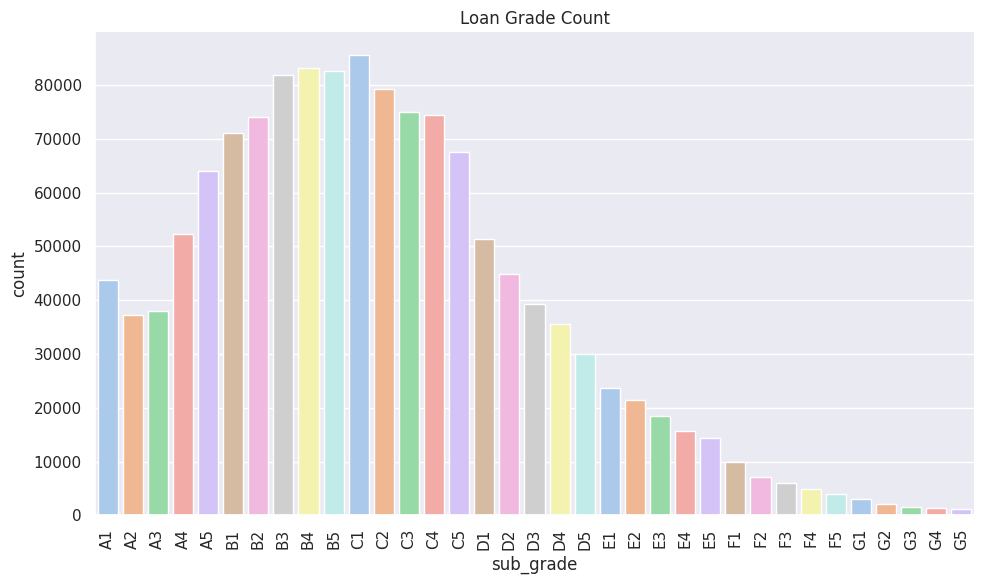

In [31]:
count_in_order_plot(loan_data, "sub_grade", "Loan Grade Count", order=loan_data["sub_grade"].unique().sort_values().tolist())

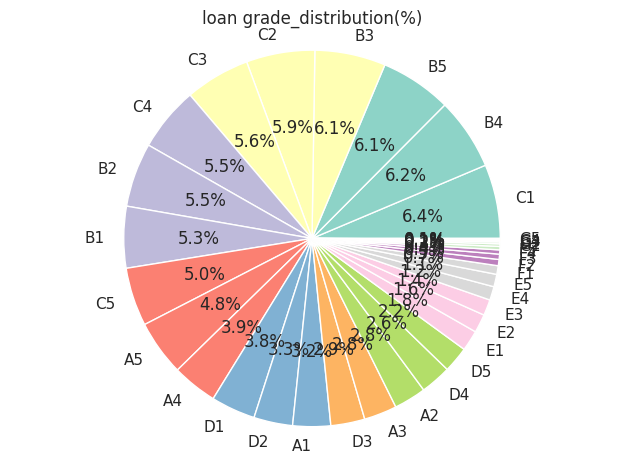

In [32]:
pie_plot (loan_data,"sub_grade",title = "loan grade_distribution(%)")

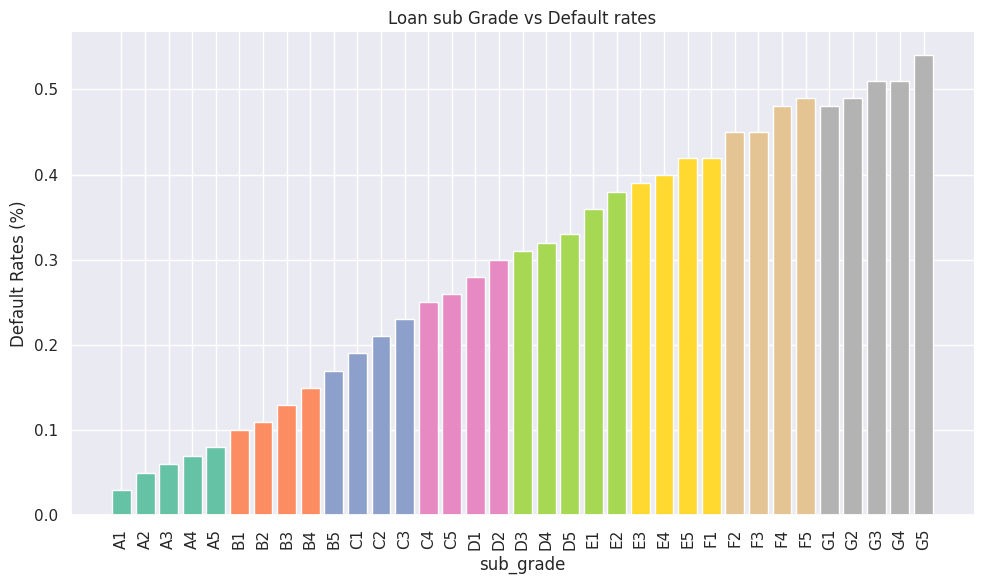

In [33]:
Cat_col_vs_default_rate (loan_data,'sub_grade','loan_status','Loan sub Grade vs Default rates')

* Since loan grade and sub grade imply each other only loan grade will be used.
* Most of the loan issued either belongs too grade B or C wich make up to 57% of all loans.
* Default rate tends to worsen as the loan grade worsen.
* Loan garde E,F,G have more that 30% deafult rate but also verly less loan were issued for those grades

### Installment

In [34]:
feature_exploration (loan_data,"installment",numeric = True)

Description:
count    1.345350e+06
mean     4.380755e+02
std      2.615145e+02
min      4.930000e+00
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      1.719830e+03
Name: installment, dtype: float64
**************************************************
Object type:float32


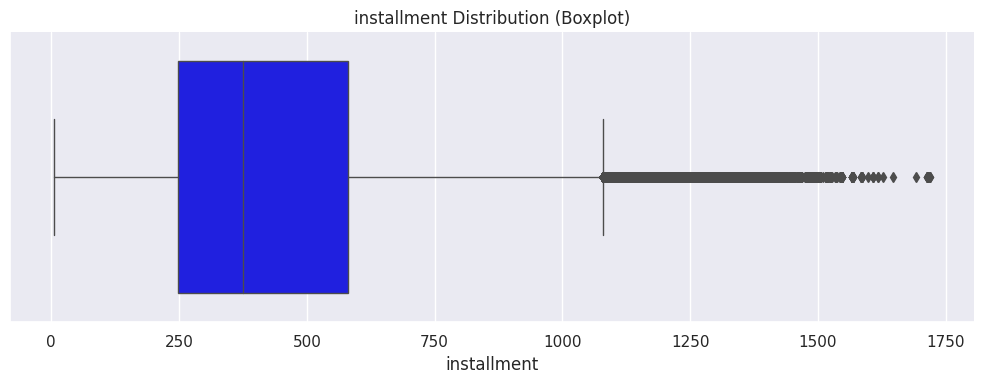

In [35]:
box_plot(loan_data,'installment')

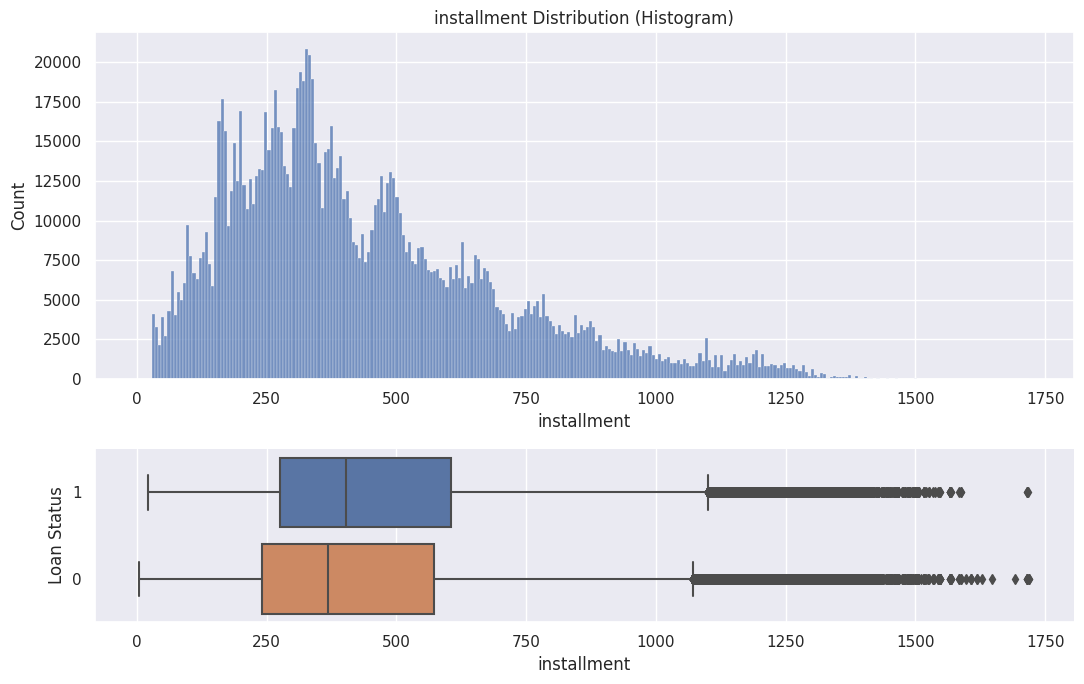

In [36]:
dist_plot (loan_data,"installment")

In [37]:
loan_data.groupby('loan_status')['installment'].describe()

count        mean         std        min         25%  \
loan_status                                                             
0             268599.0  465.144073  262.783569  21.620001  275.290009   
1            1076751.0  431.323181  260.759552   4.930000  240.919998   

                    50%         75%          max  
loan_status                                       
0            402.829987  605.309998  1717.630005  
1            368.260010  573.059998  1719.829956

* instalment range from $ 4 - $ 1720 
* distribution is positively skewed 
* Loans that charge off have $30 higher installments on average.

### Employment title

In [38]:
print(loan_data['emp_title'].describe())
print('*'*50)
print(loan_data['emp_title'].nunique()) 

count     1259559
unique     378358
top       Teacher
freq        21268
Name: emp_title, dtype: object
**************************************************
378358


* since their are 378358 unique variables feature will be droped 

In [39]:
"""
import spacy
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import time

# Load the spaCy model with pre-trained word embeddings
nlp = spacy.load('en_core_web_sm')

# Define general industry categories and associated keywords
industry_categories = {
    'Technology': ['technology', 'software', 'engineer', 'data', 'developer'],
    'Finance': ['finance', 'banking', 'investment', 'accounting', 'analyst'],
    'Healthcare': ['healthcare', 'medical', 'nurse', 'doctor', 'pharmaceutical'],
    'Education': ['education', 'teacher', 'instructor', 'tutor', 'school'],
    # Add more general industry categories and their associated keywords as needed
}

# Function to assign industry based on job title similarity
def assign_industry(job_title, industry_categories):
    if job_title is None or not isinstance(job_title, str):
        return "Other"

    job_title_doc = nlp(job_title.lower())

    max_similarity = 0.0
    assigned_industry = None

    for industry, keywords in industry_categories.items():
        if not job_title_doc.has_vector or not nlp(' '.join(keywords)).has_vector:
            continue

        keyword_doc = nlp(' '.join(keywords).lower())
        similarity = job_title_doc.similarity(keyword_doc)

        if similarity > max_similarity:
            max_similarity = similarity
            assigned_industry = industry

    return assigned_industry

# Create a new column 'industry' with the mapped industry for each job title
num_jobs = len(loan_data['emp_title'])
start_time = time.time()

with tqdm(total=num_jobs, ncols=80, unit='job') as progress_bar:
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(assign_industry, loan_data['emp_title'], [industry_categories] * num_jobs))
        loan_data['industry'] = results
        progress_bar.update(num_jobs)

elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds") 

"""

'\nimport spacy\nfrom concurrent.futures import ThreadPoolExecutor\nfrom tqdm import tqdm\nimport time\n\n# Load the spaCy model with pre-trained word embeddings\nnlp = spacy.load(\'en_core_web_sm\')\n\n# Define general industry categories and associated keywords\nindustry_categories = {\n    \'Technology\': [\'technology\', \'software\', \'engineer\', \'data\', \'developer\'],\n    \'Finance\': [\'finance\', \'banking\', \'investment\', \'accounting\', \'analyst\'],\n    \'Healthcare\': [\'healthcare\', \'medical\', \'nurse\', \'doctor\', \'pharmaceutical\'],\n    \'Education\': [\'education\', \'teacher\', \'instructor\', \'tutor\', \'school\'],\n    # Add more general industry categories and their associated keywords as needed\n}\n\n# Function to assign industry based on job title similarity\ndef assign_industry(job_title, industry_categories):\n    if job_title is None or not isinstance(job_title, str):\n        return "Other"\n\n    job_title_doc = nlp(job_title.lower())\n\n    ma

### Employment Length

In [40]:
feature_exploration(loan_data,'emp_length', numeric = False)

Description:
count       1266834
unique           11
top       10+ years
freq         442209
Name: emp_length, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
            Count  Frequency (%)
10+ years  442209      34.906625
2 years    121751       9.610651
< 1 year   108065       8.530320
3 years    107602       8.493773
1 year      88495       6.985525
5 years     84154       6.642859
4 years     80558       6.359002
6 years     62735       4.952109
8 years     60704       4.791788
7 years     59624       4.706536
9 years     50937       4.020811


In [41]:
loan_data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
loan_data['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [42]:
loan_data['emp_length'] = loan_data['emp_length'].apply(emp_length_to_int)

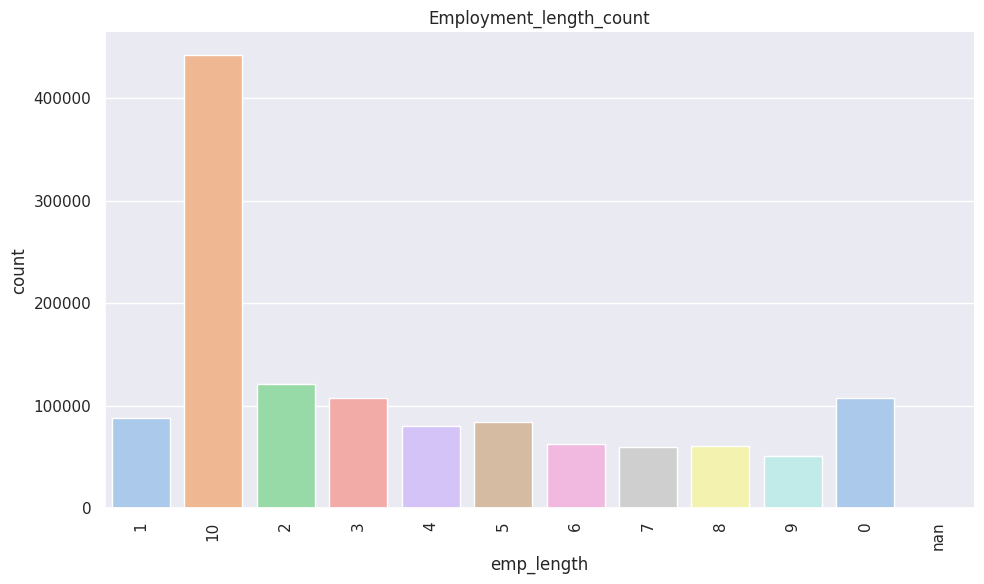

In [43]:
count_in_order_plot (loan_data,"emp_length","Employment_length_count",loan_data["emp_length"].unique().sort_values().to_list())

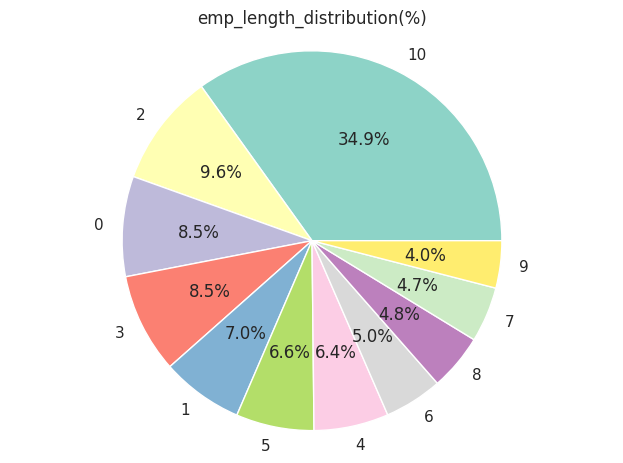

In [44]:
pie_plot (loan_data,"emp_length",title = "emp_length_distribution(%)")

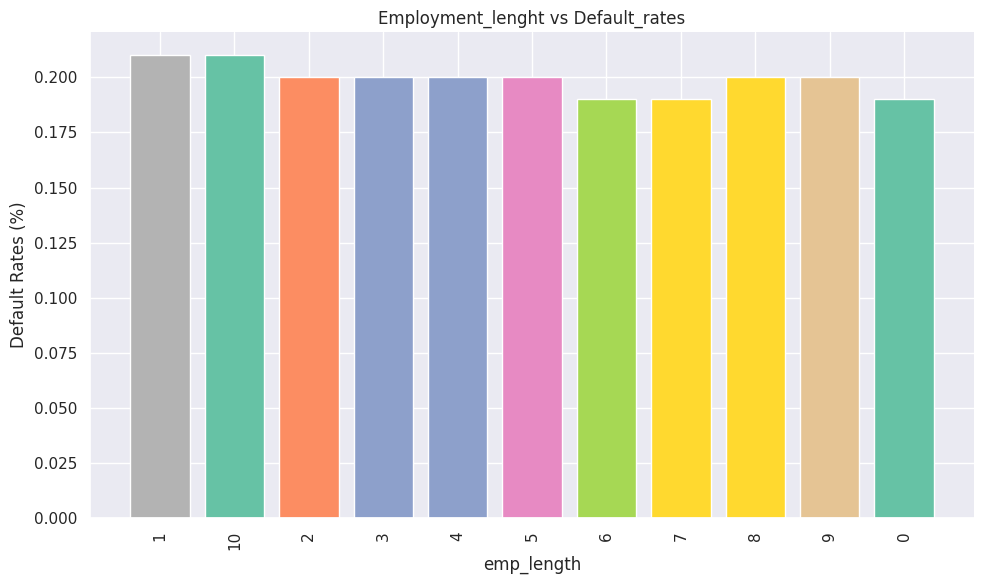

In [45]:
Cat_col_vs_default_rate (loan_data,'emp_length','loan_status','Employment_lenght vs Default_rates')

* most of the loan applicants have 10+ years of experience.
* this is no significant difference in default rate across employment length hence this feature will be droped

### fico_range_high , fico_range_low

In [46]:
print(loan_data[['fico_range_low','fico_range_high']].describe())
print('*'*50)
print(loan_data[['fico_range_low','fico_range_high']].corr())

       fico_range_low  fico_range_high
count    1.345350e+06     1.345350e+06
mean     6.961851e+02     7.001852e+02
std      3.185280e+01     3.185345e+01
min      6.250000e+02     6.290000e+02
25%      6.700000e+02     6.740000e+02
50%      6.900000e+02     6.940000e+02
75%      7.100000e+02     7.140000e+02
max      8.450000e+02     8.500000e+02
**************************************************
                 fico_range_low  fico_range_high
fico_range_low              1.0              1.0
fico_range_high             1.0              1.0


In [47]:
#creating new variable Fico_average
loan_data['Fico_average'] = (loan_data['fico_range_low'] + loan_data['fico_range_high'])/2
#creting new variable Fico_average
print(loan_data['Fico_average'].head())

0    677.0
1    717.0
2    697.0
4    697.0
5    692.0
Name: Fico_average, dtype: float32


In [48]:
feature_exploration(loan_data,'Fico_average',numeric=True)

Description:
count    1.345350e+06
mean     6.981852e+02
std      3.185312e+01
min      6.270000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.120000e+02
max      8.475000e+02
Name: Fico_average, dtype: float64
**************************************************
Object type:float32


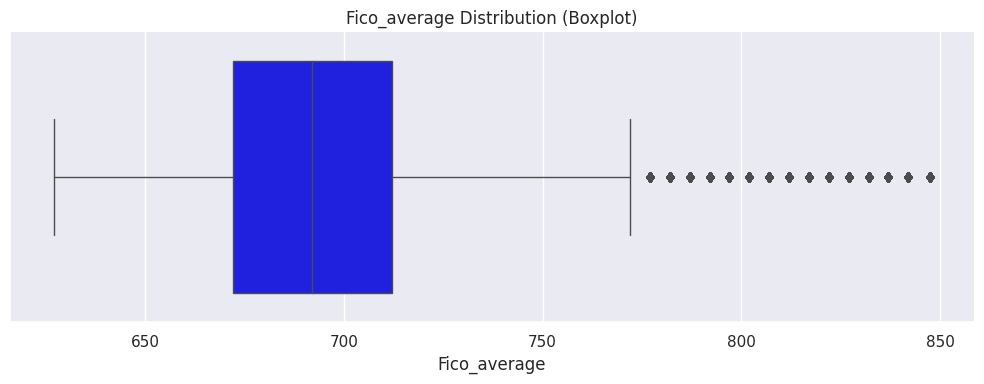

In [49]:
box_plot(loan_data,"Fico_average")

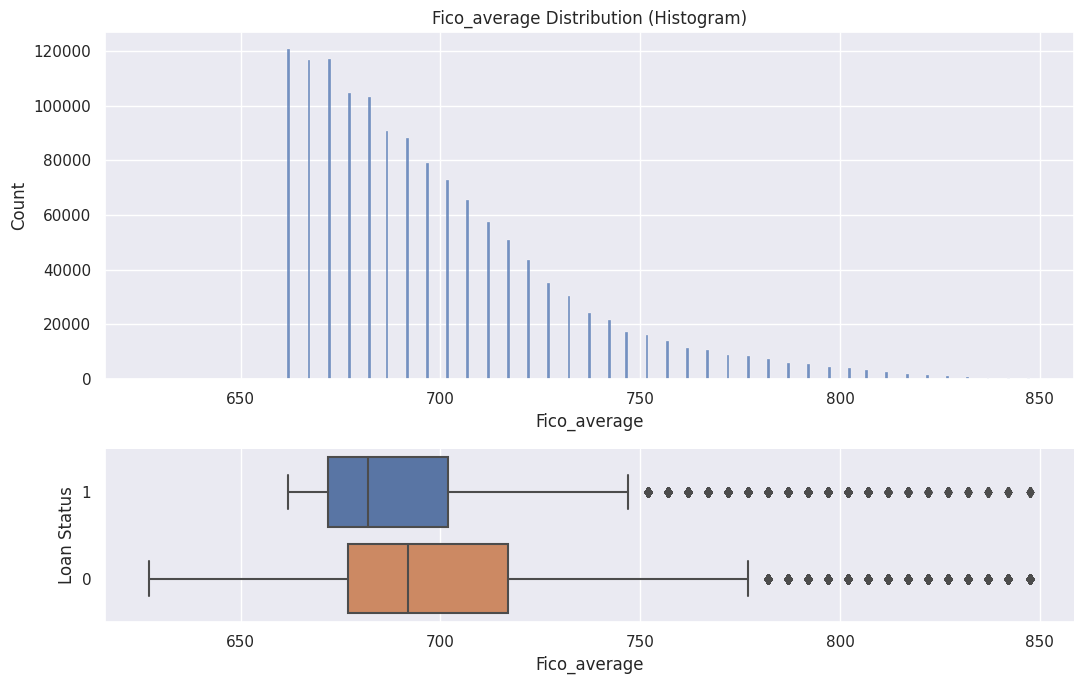

In [50]:
dist_plot(loan_data,"Fico_average")

* most the applicant have a Fico score ranging form 660 to 700.
* as expexted applicant with higher fico score are more likely pay back the loan.
* positively skewed.

### home_ownership

In [51]:
feature_exploration (loan_data,'home_ownership',numeric=False)

Description:
count      1345350
unique           6
top       MORTGAGE
freq        665596
Name: home_ownership, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
           Count  Frequency (%)
MORTGAGE  665596      49.473817
RENT      534436      39.724681
OWN       144840      10.765972
ANY          286       0.021258
OTHER        144       0.010704
NONE          48       0.003568


In [52]:
#binning none and any to other
loan_data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)
loan_data['home_ownership'].value_counts(dropna=False)

MORTGAGE    665596
RENT        534436
OWN         144840
OTHER          478
Name: home_ownership, dtype: int64

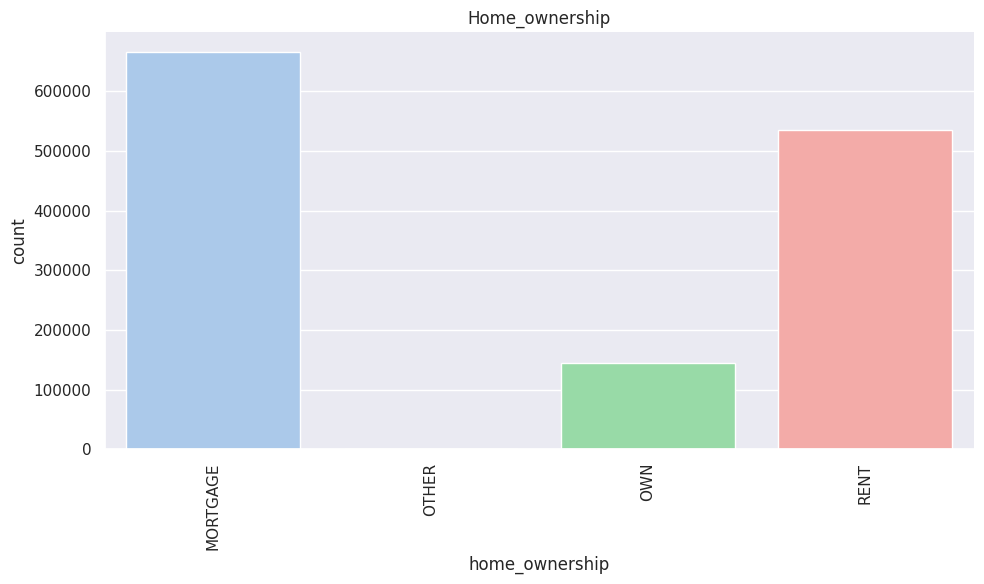

In [53]:
count_plot (loan_data,"home_ownership","Home_ownership")

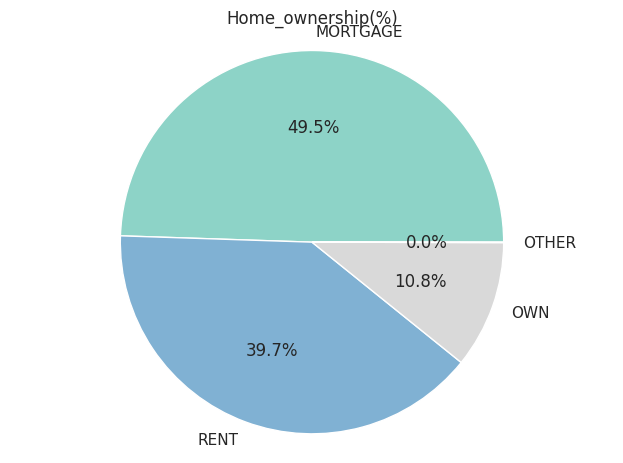

In [54]:
pie_plot (loan_data,"home_ownership","Home_ownership(%)")

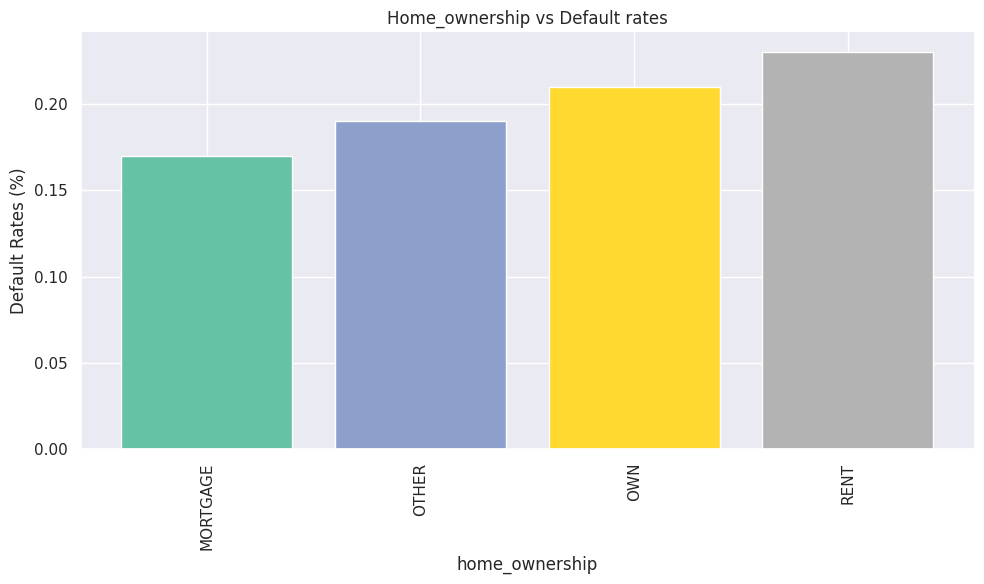

In [55]:
Cat_col_vs_default_rate (loan_data,'home_ownership','loan_status','Home_ownership vs Default rates')

* most for the loan applicants have mortgage no thier home 
* applicants with mortgage also have lower default rate compaired ot own and rent 
* other only consists 0.3% of total loan applicants

### Annual_inc

In [56]:
feature_exploration (loan_data,'annual_inc',numeric=True)

Description:
count    1.345350e+06
mean     7.624757e+04
std      6.992485e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64
**************************************************
Object type:float64


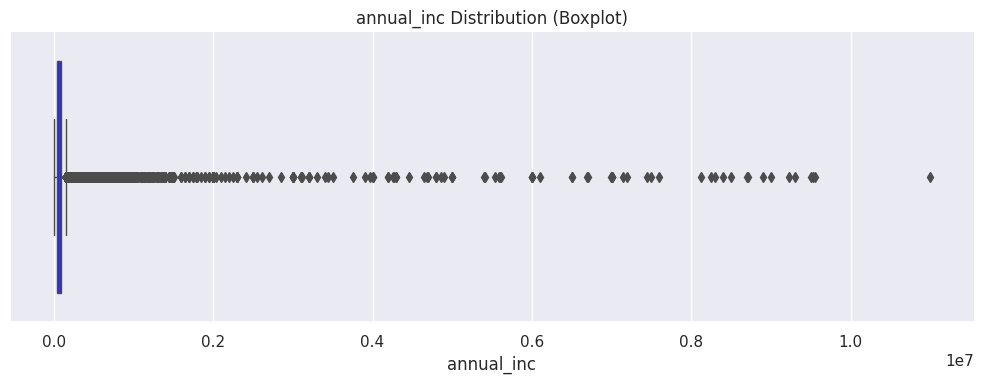

In [57]:
box_plot(loan_data,'annual_inc')

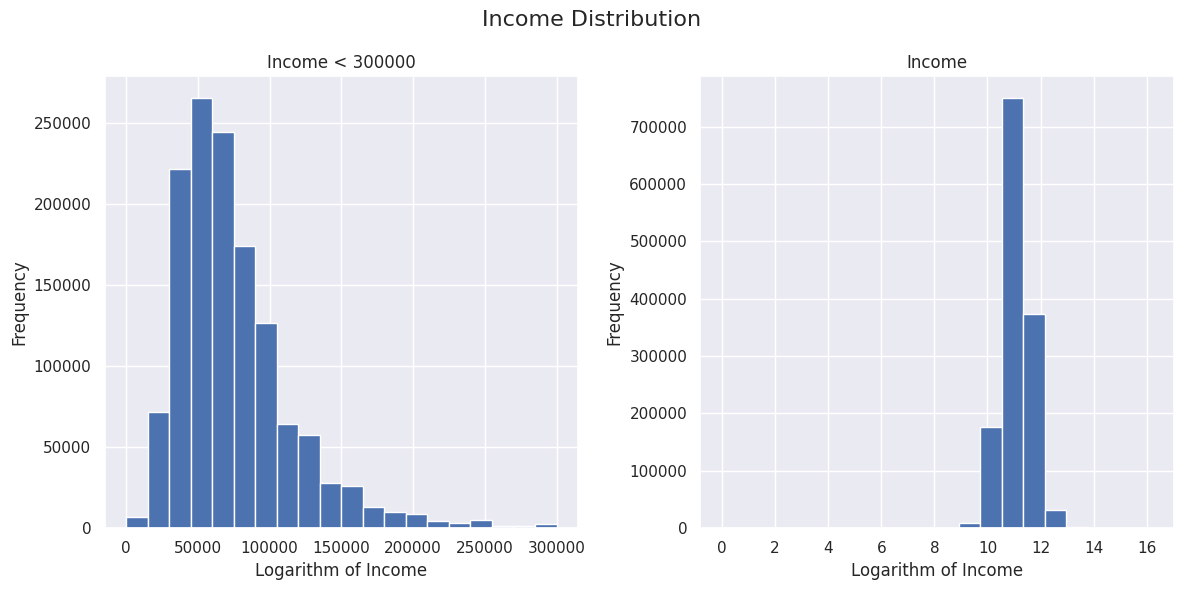

In [58]:
annual_inc_less = loan_data['annual_inc'][loan_data['annual_inc'] <= 300000] 
annual_inc = np.log(loan_data["annual_inc"] + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(annual_inc_less, bins=20)
axes[0].set_title("Income < 300000")
axes[0].set_xlabel("Logarithm of Income")
axes[0].set_ylabel("Frequency")

axes[1].hist(annual_inc, bins=20)
axes[1].set_title("Income")
axes[1].set_xlabel("Logarithm of Income")
axes[1].set_ylabel("Frequency")

plt.suptitle("Income Distribution", fontsize=16)
plt.tight_layout()
plt.show()

In [59]:
print('annual income greater than 1 million',loan_data.loc[loan_data.annual_inc >= 1000000, 'loan_status'].value_counts())
print('*'*50)
print('annual income greater than 300k',loan_data.loc[loan_data.annual_inc >= 300000, 'loan_status'].value_counts())

annual income greater than 1 million 1    294
0     45
Name: loan_status, dtype: int64
**************************************************
annual income greater than 300k 1    8311
0    1197
Name: loan_status, dtype: int64


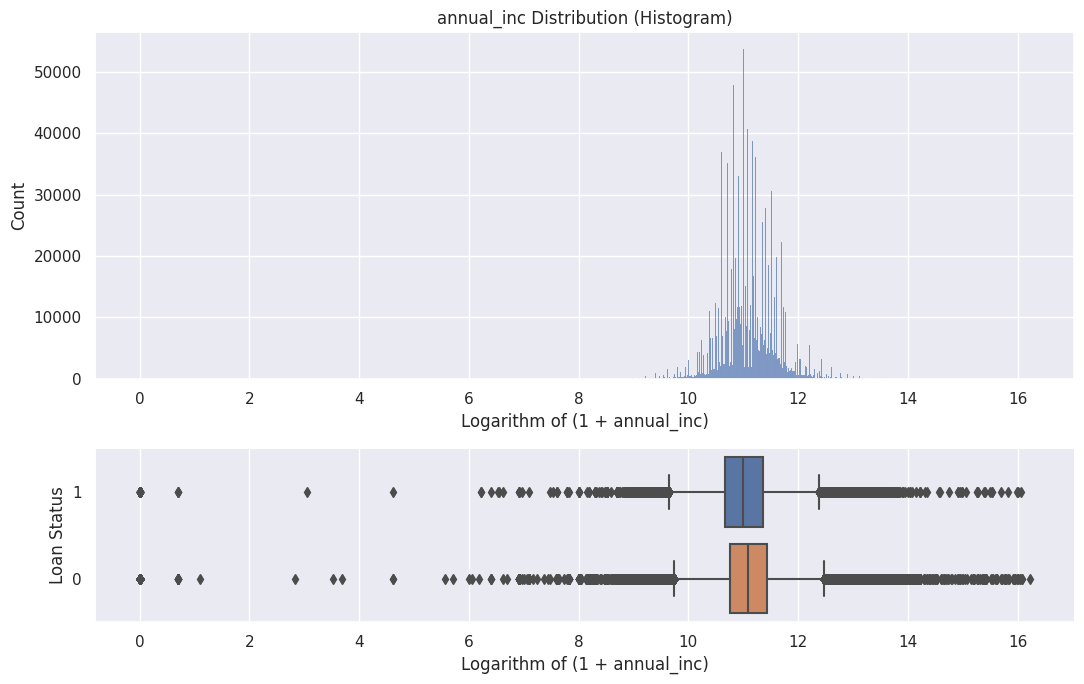

In [60]:
log_dist_plot(loan_data,'annual_inc')

- only 350 peolple make over 1 milion a year
- most of the income is in  the range 50000 to 100000

### dti

In [61]:
feature_exploration(loan_data,"dti",numeric = True)

Description:
count    1.344976e+06
mean     1.828263e+01
std      1.116041e+01
min      0.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64
**************************************************
Object type:float32


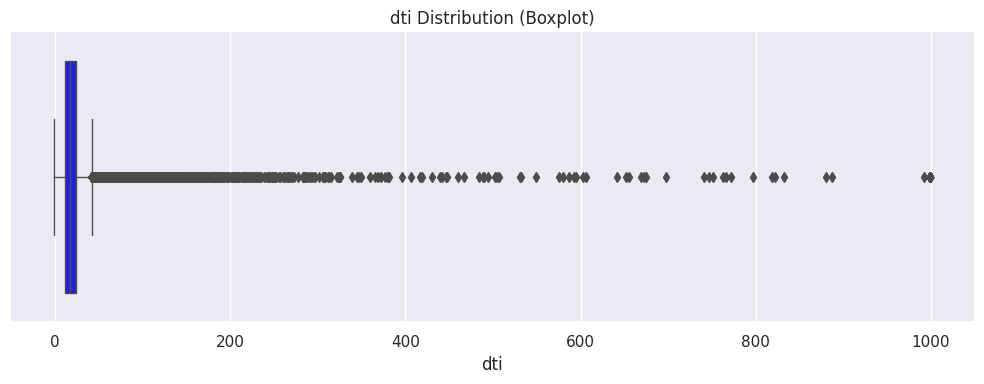

In [62]:
box_plot(loan_data,"dti")

/home/analyst/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


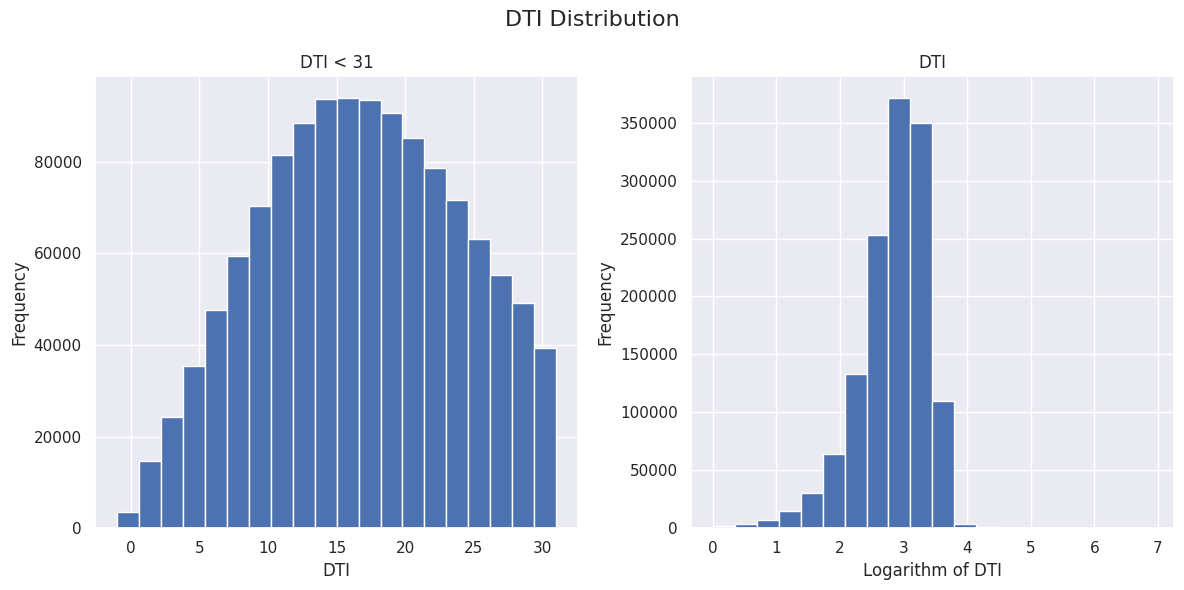

In [63]:
dti_less = loan_data['dti'][loan_data['dti'] <= 31]
dti = np.log1p(loan_data["dti"])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(dti_less, bins=20)
axes[0].set_title("DTI < 31")
axes[0].set_xlabel("DTI")
axes[0].set_ylabel("Frequency")

axes[1].hist(dti[~np.isinf(dti)], bins=20)
axes[1].set_title("DTI")
axes[1].set_xlabel("Logarithm of DTI")
axes[1].set_ylabel("Frequency")

plt.suptitle("DTI Distribution", fontsize=16)
plt.tight_layout()
plt.show()

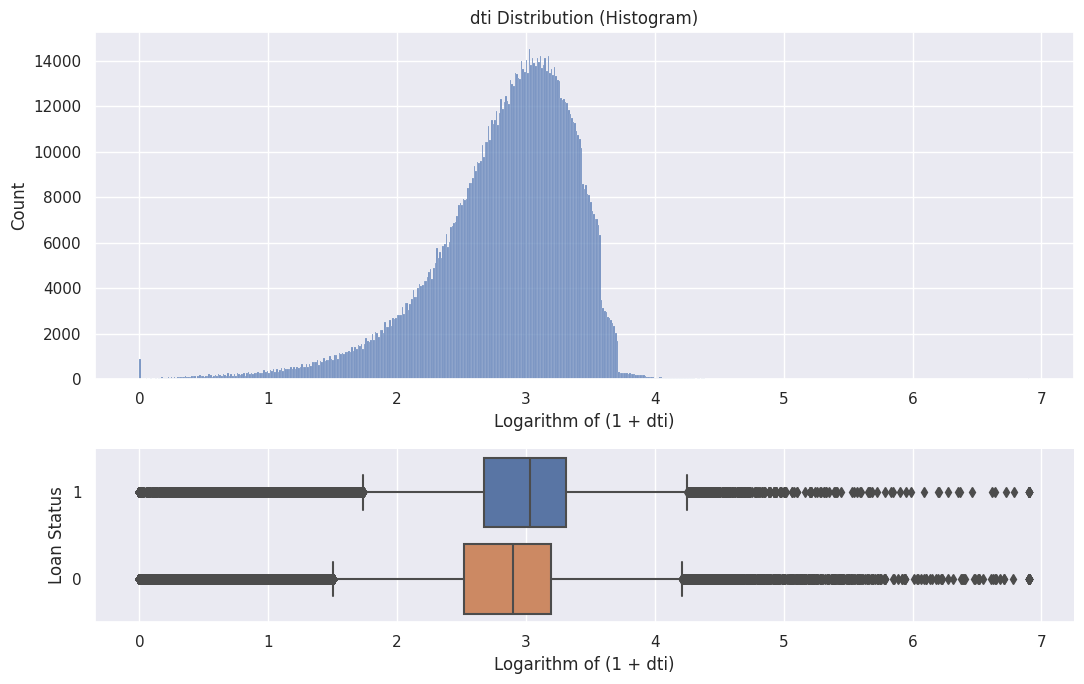

In [64]:
log_dist_plot(loan_data,'dti')

- most the dit lies betwine to 0 and 31
- peopel with lower dit are more likely to default

### verification_status

In [65]:
feature_exploration (loan_data,'verification_status',numeric=False)

Description:
count             1345350
unique                  3
top       Source Verified
freq               521289
Name: verification_status, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
                  Count  Frequency (%)
Source Verified  521289      38.747463
Verified         418352      31.096146
Not Verified     405709      30.156391


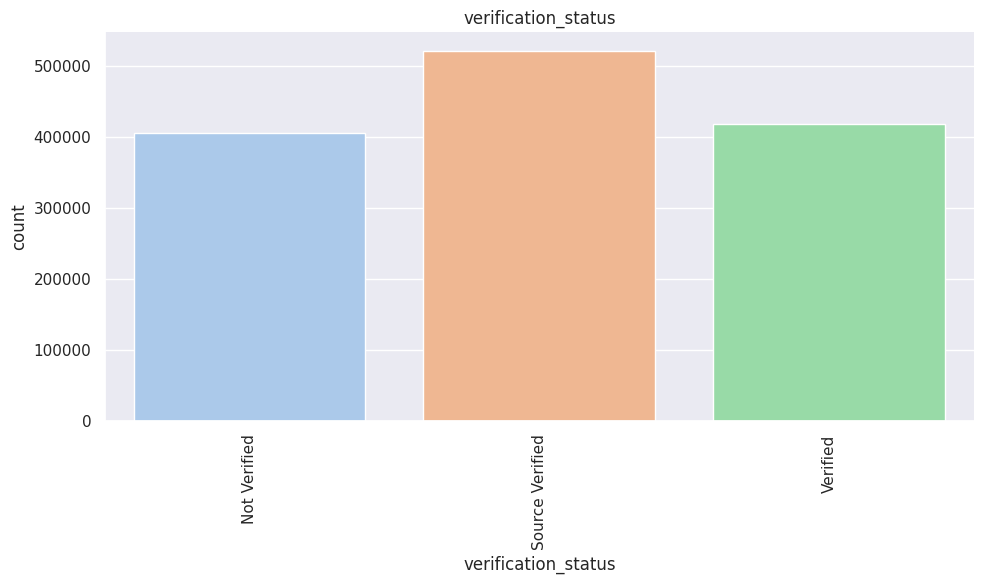

In [66]:
count_plot (loan_data,"verification_status","verification_status")

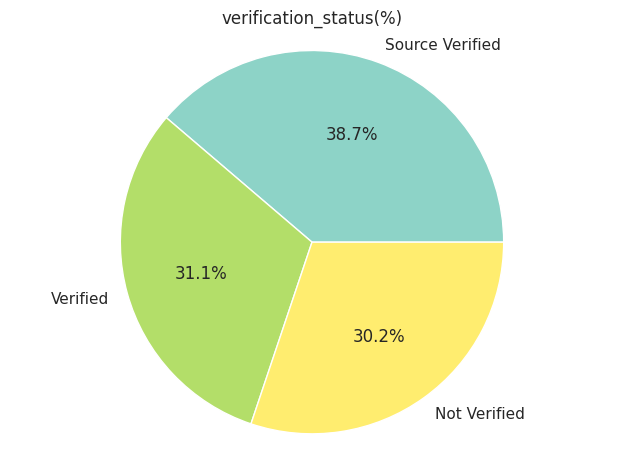

In [67]:
pie_plot (loan_data,"verification_status","verification_status(%)")

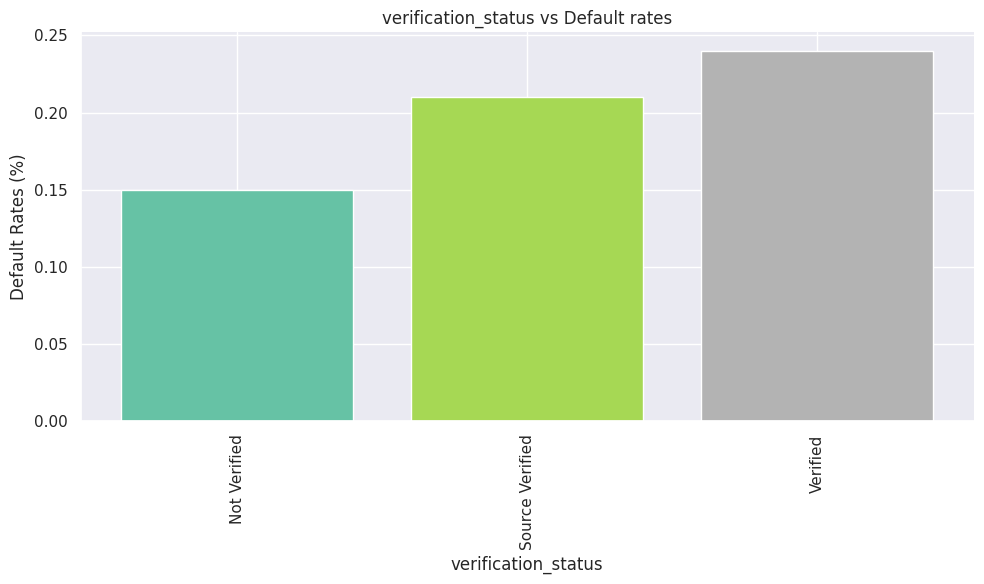

In [68]:
Cat_col_vs_default_rate (loan_data,'verification_status','loan_status','verification_status vs Default rates')

### Loan Purpose , Title

In [69]:
feature_exploration (loan_data,'purpose',numeric=False)

Description:
count                1345350
unique                    14
top       debt_consolidation
freq                  780342
Name: purpose, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
                     Count  Frequency (%)
debt_consolidation  780342      58.002899
credit_card         295285      21.948564
home_improvement     87507       6.504404
other                77877       5.788605
major_purchase       29427       2.187312
medical              15556       1.156279
small_business       15416       1.145873
car                  14588       1.084327
moving                9480       0.704649
vacation              9065       0.673802
house                 7254       0.539191
wedding               2294       0.170513
renewable_energy       933       0.069350
educational            326       0.024232


In [70]:
print('Description:\n{}'.format(loan_data["title"].describe()))
print('*'*50)
print('Value count:\n{}'.format(loan_data["title"].value_counts().head(10)))
print('*'*50)
print('df_length:\n{}'.format(len(loan_data['title'])))

Description:
count                1328691
unique                 61682
top       Debt consolidation
freq                  660981
Name: title, dtype: object
**************************************************
Value count:
Debt consolidation         660981
Credit card refinancing    249916
Home improvement            75076
Other                       66780
Major purchase              24047
Debt Consolidation          15695
Medical expenses            13578
Business                    11750
Car financing               11223
Vacation                     8046
Name: title, dtype: int64
**************************************************
df_length:
1345350


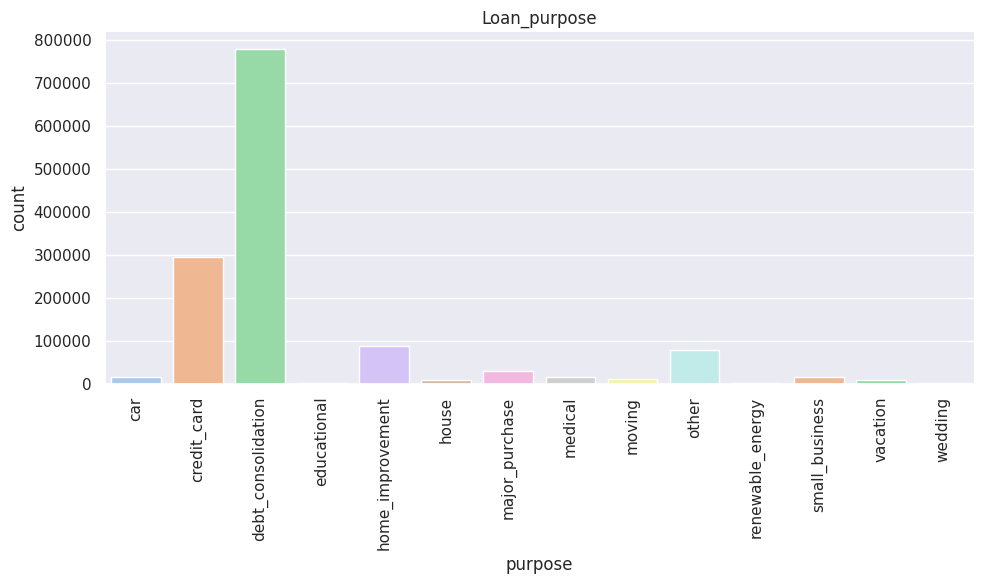

In [71]:
count_plot (loan_data,'purpose',"Loan_purpose")

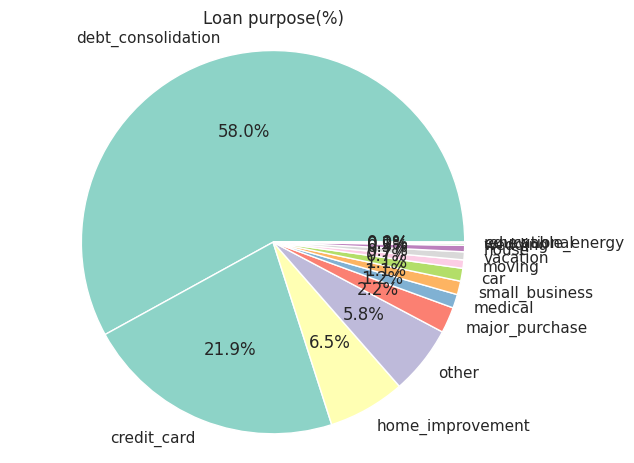

In [72]:
pie_plot (loan_data,"purpose","Loan purpose(%)")

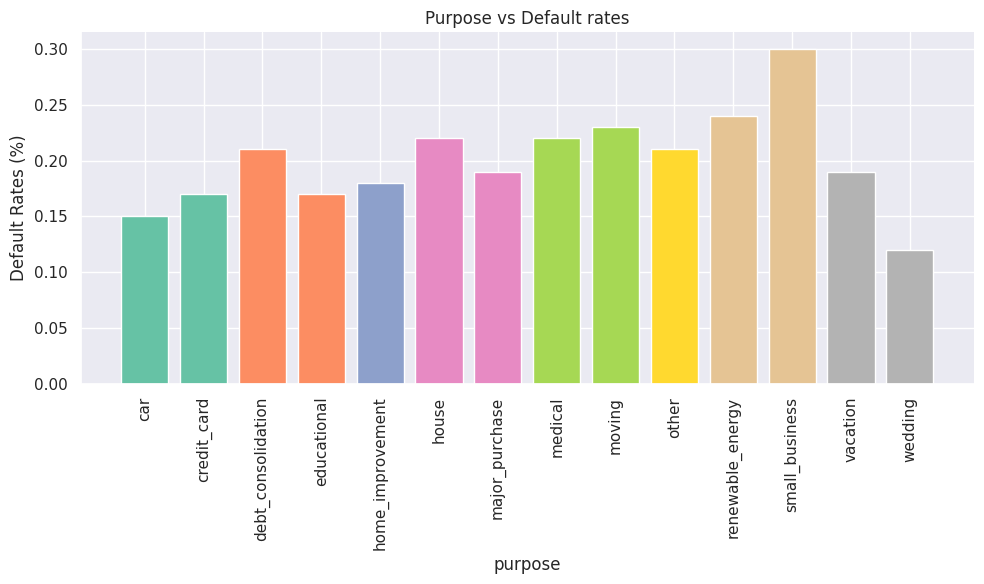

In [73]:
Cat_col_vs_default_rate (loan_data,'purpose','loan_status','Purpose vs Default rates')

- most of the loans are take fro the purpose of Credit card det and to consolidate debt.
- Title column will be droped since it is implyed by Purpose.

### addr_state,zip code

In [74]:
## Bining US states into Regions for better  understanding
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



loan_data['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


loan_data['region'] = loan_data['addr_state'].apply(finding_regions)

In [75]:
feature_exploration (loan_data,'region',numeric=False)

Description:
count       1345350
unique            5
top       SouthEast
freq         324912
Name: region, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
SouthEast  324912      24.150741
West       320484      23.821608
NorthEast  302760      22.504181
MidWest    234681      17.443862
SouthWest  162513      12.079608


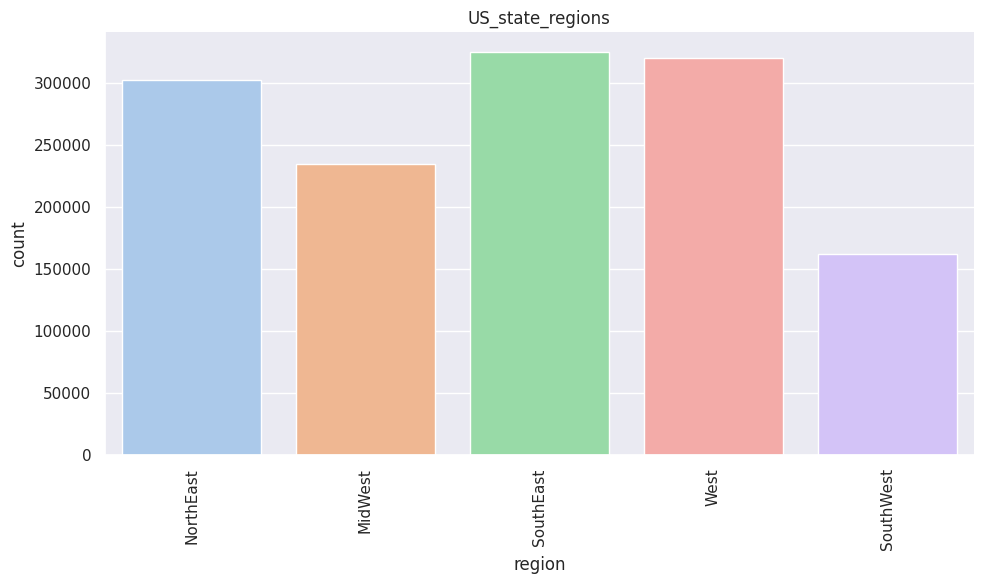

In [76]:
count_plot(loan_data,"region","US_state_regions")

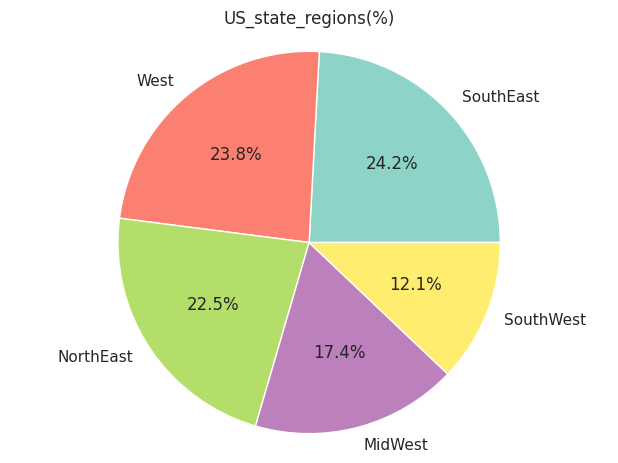

In [77]:
pie_plot(loan_data,'region','US_state_regions(%)')

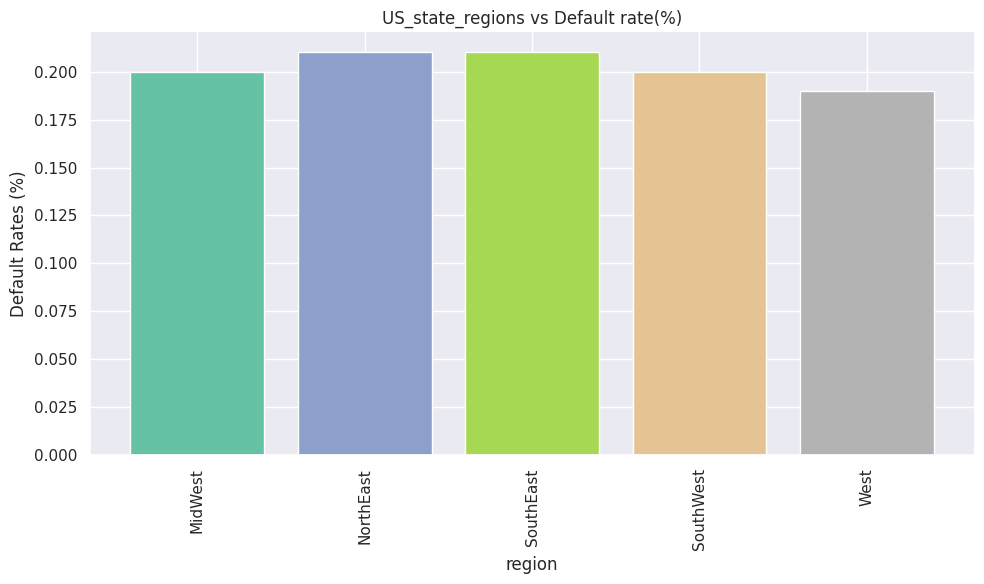

In [78]:
Cat_col_vs_default_rate (loan_data,'region','loan_status','US_state_regions vs Default rate(%)')

- since their over 50 diffrent states in us i have grouped them into 5 regions reduce cardnility 
- as we can see default rate are simelar over all regons

### open_acc

In [79]:
feature_exploration (loan_data,'open_acc',numeric=True)

Description:
count    1.345350e+06
mean     1.159351e+01
std      5.473848e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      9.000000e+01
Name: open_acc, dtype: float64
**************************************************
Object type:float32


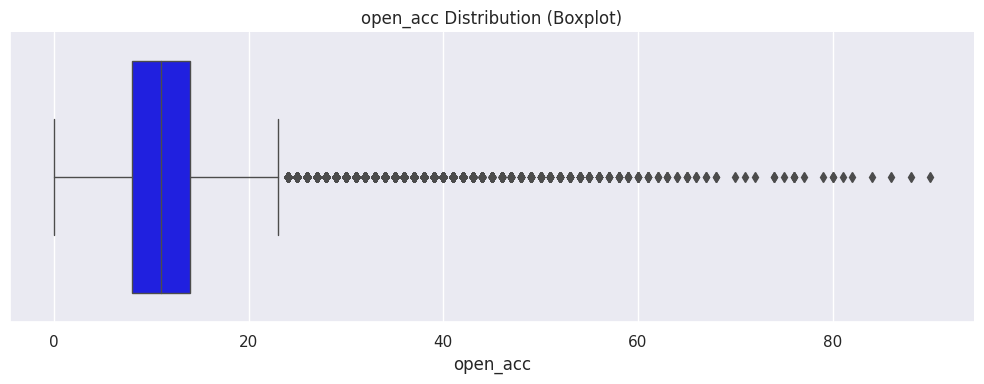

In [80]:
box_plot(loan_data,'open_acc')

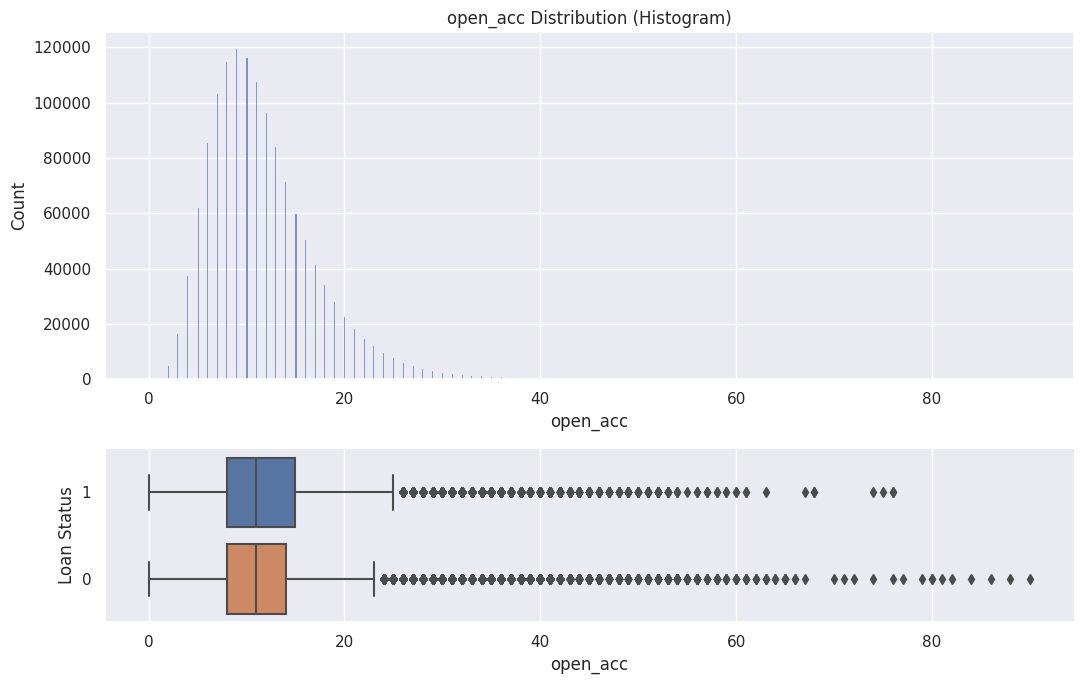

In [81]:
dist_plot(loan_data,"open_acc")

- The "open_acc" variable represents the number of open credit lines in your credit file, which indicates the number of active credit accounts you currently have.
- In your case, the value of "open_acc" ranges from 0 to 40, with a skewed distribution towards the left. This suggests that you have a relatively lower number of open credit lines, indicating a conservative approach towards credit and potentially lower reliance on multiple credit accounts.

### revol_bal

In [82]:
feature_exploration(loan_data,"revol_bal",numeric = True)

Description:
count    1.345350e+06
mean     1.624796e+04
std      2.232791e+04
min      0.000000e+00
25%      5.943000e+03
50%      1.113400e+04
75%      1.975500e+04
max      2.904836e+06
Name: revol_bal, dtype: float64
**************************************************
Object type:float32


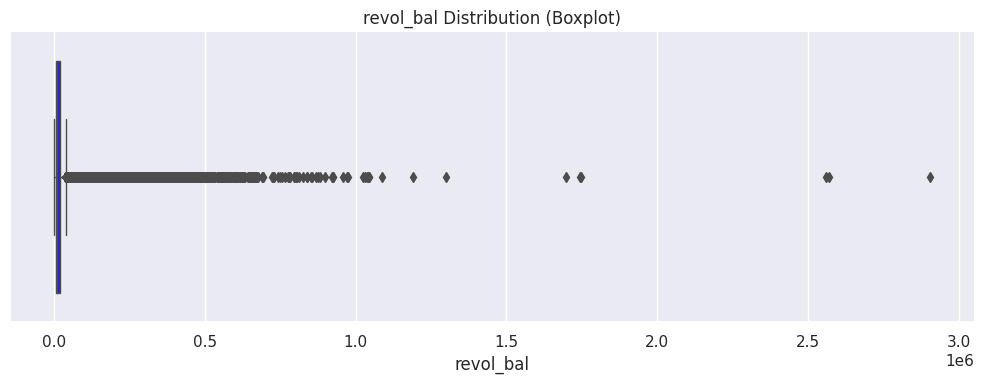

In [83]:
box_plot(loan_data,'revol_bal')

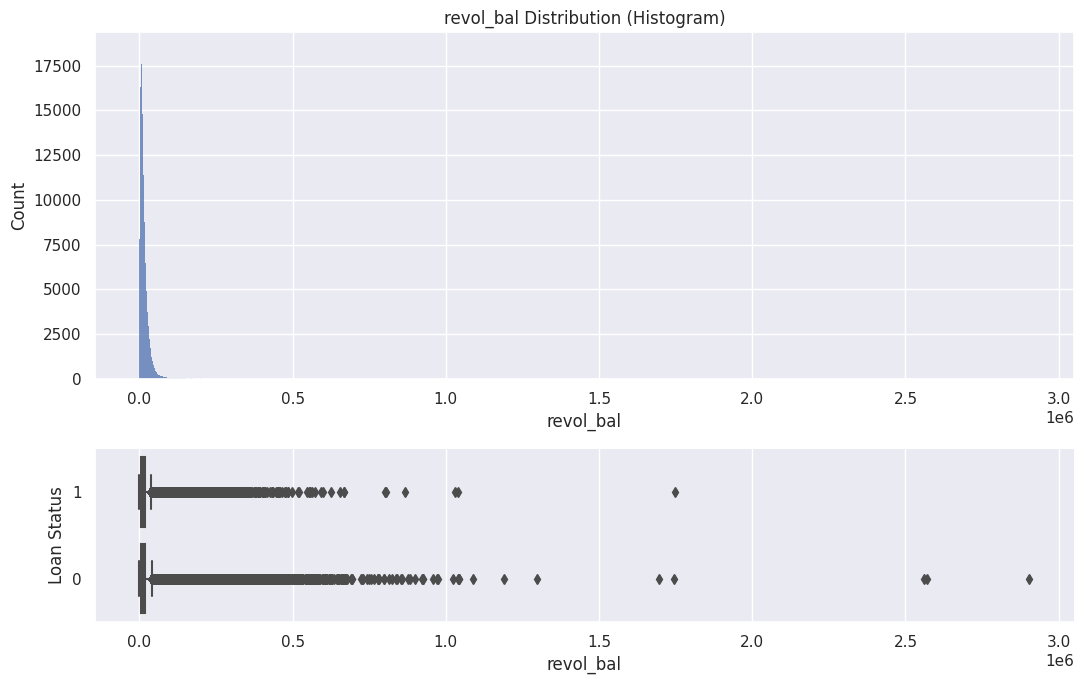

In [84]:
dist_plot(loan_data,'revol_bal') 

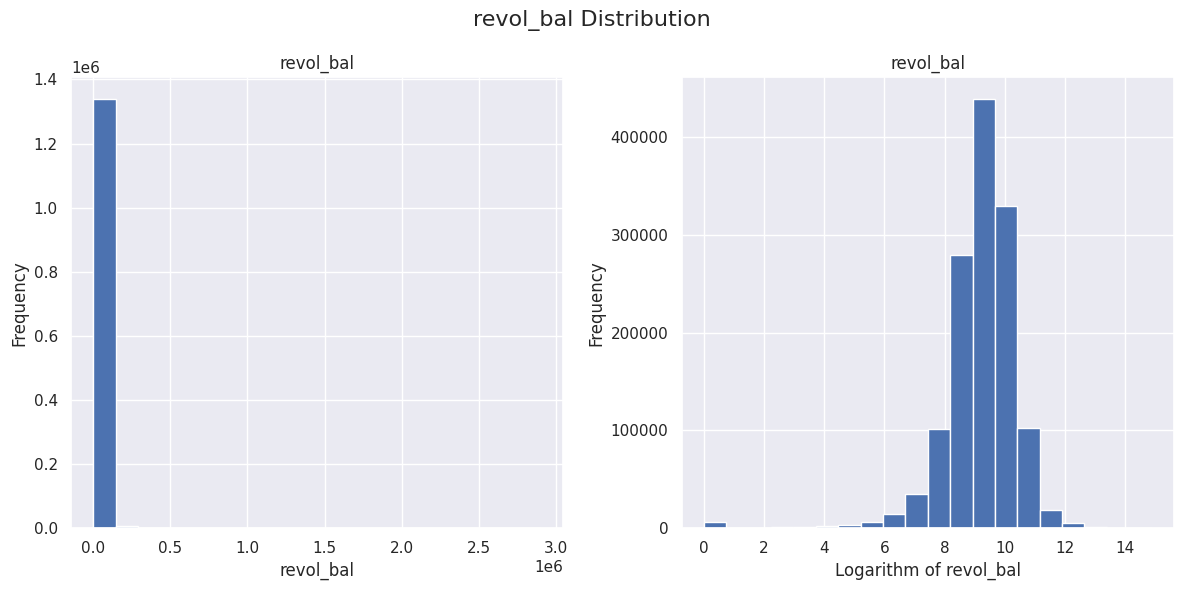

In [85]:
dti_less = loan_data['revol_bal']
dti = np.log1p(loan_data["revol_bal"])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(dti_less, bins=20)
axes[0].set_title("revol_bal")
axes[0].set_xlabel("revol_bal")
axes[0].set_ylabel("Frequency")

axes[1].hist(dti[~np.isinf(dti)], bins=20)
axes[1].set_title("revol_bal")
axes[1].set_xlabel("Logarithm of revol_bal")
axes[1].set_ylabel("Frequency")

plt.suptitle("revol_bal Distribution", fontsize=16)
plt.tight_layout()
plt.show()

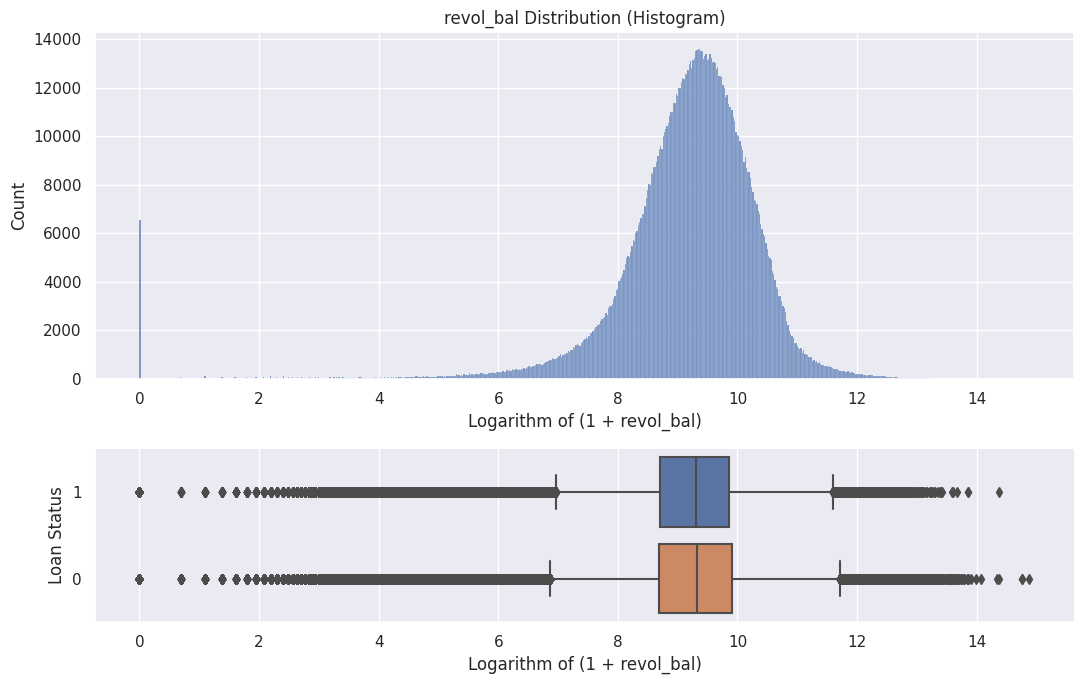

In [86]:
log_dist_plot(loan_data,'revol_bal')

### total_acc

In [87]:
feature_exploration(loan_data,'total_acc',numeric = True)

Description:
count    1.345350e+06
mean     2.498075e+01
std      1.199852e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64
**************************************************
Object type:float32


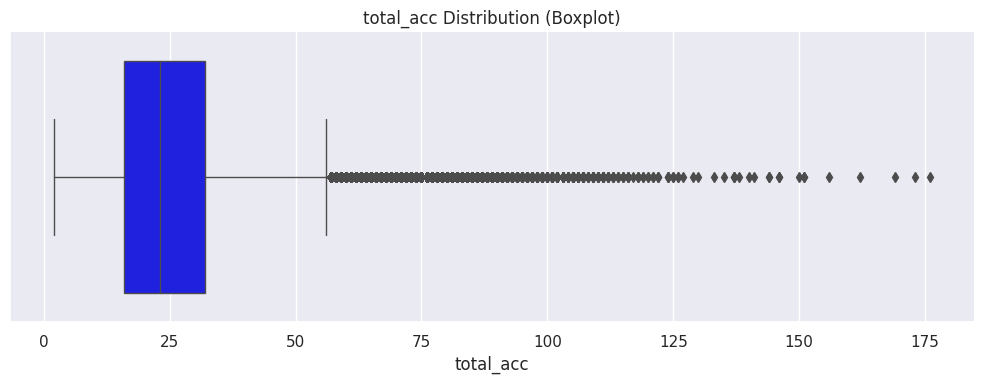

In [88]:
box_plot(loan_data,'total_acc')

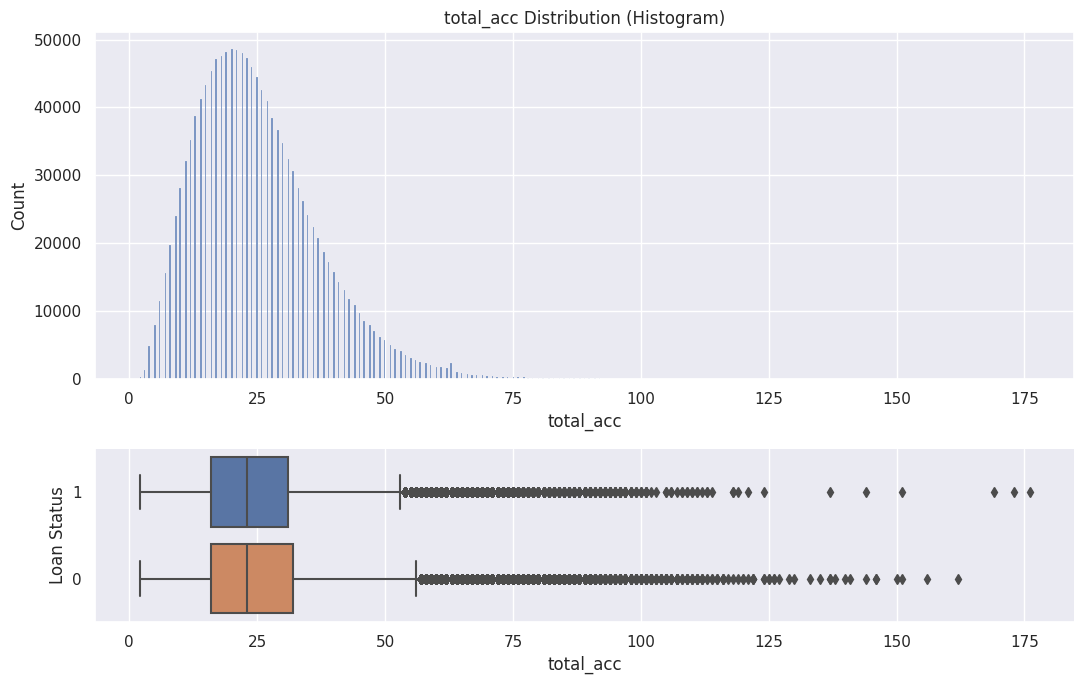

In [89]:
dist_plot(loan_data,'total_acc')

- "total_acc" represents the total number of credit lines that are currently present in the borrower's credit file.
- The values for "total_acc" range from 0 to 75, with a left-skewed distribution. This means that most borrowers have a relatively lower number of total credit lines, while a few borrowers have a higher number of total credit lines.

### revol_util

In [90]:
feature_exploration(loan_data,'revol_util',numeric = True)

Description:
count    1.344493e+06
mean     5.180978e+01
std      2.452110e+01
min      0.000000e+00
25%      3.340000e+01
50%      5.220000e+01
75%      7.070000e+01
max      8.923000e+02
Name: revol_util, dtype: float64
**************************************************
Object type:float32


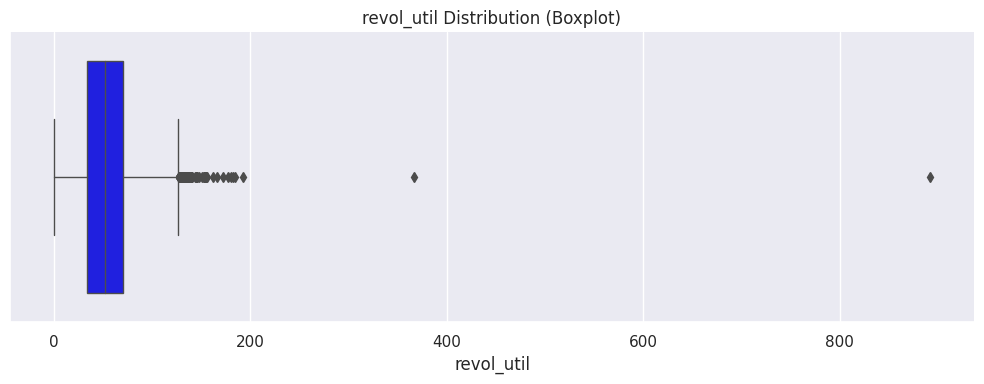

In [91]:
box_plot(loan_data,'revol_util')

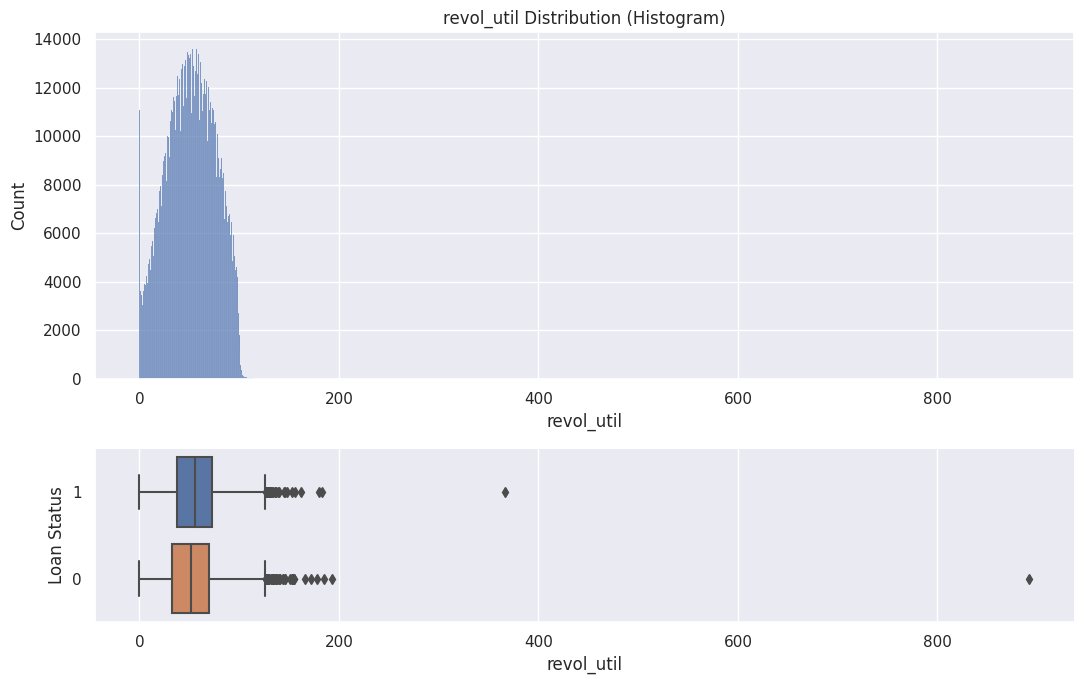

In [92]:
dist_plot(loan_data,'revol_util')

- "revol_util" represents the revolving line utilization rate, which measures the amount of credit that the borrower is currently using relative to all available revolving credit.
- The distribution of "revol_util" is normally distributed, indicating that most borrowers have a balanced utilization rate. However, there are two data points where the utilization rate exceeds 200, suggesting that these borrowers are utilizing a significantly higher amount of their available revolving credit.

### initial_list_status

In [93]:
feature_exploration(loan_data,'initial_list_status',numeric = False)

Description:
count     1345350
unique          2
top             w
freq       784041
Name: initial_list_status, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
    Count  Frequency (%)
w  784041      58.277846
f  561309      41.722154


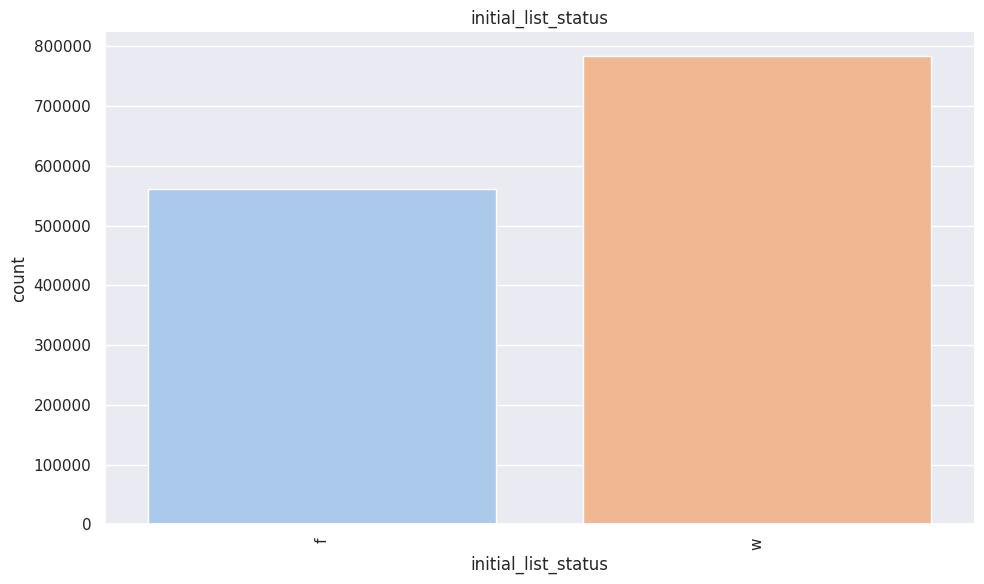

In [94]:
count_plot(loan_data,"initial_list_status","initial_list_status")

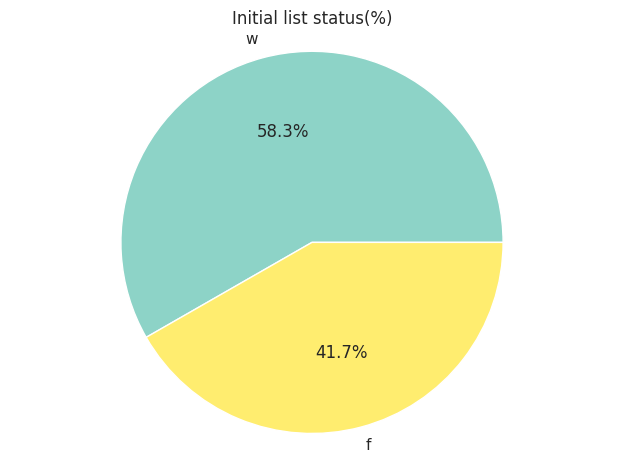

In [95]:
pie_plot (loan_data,"initial_list_status","Initial list status(%)")

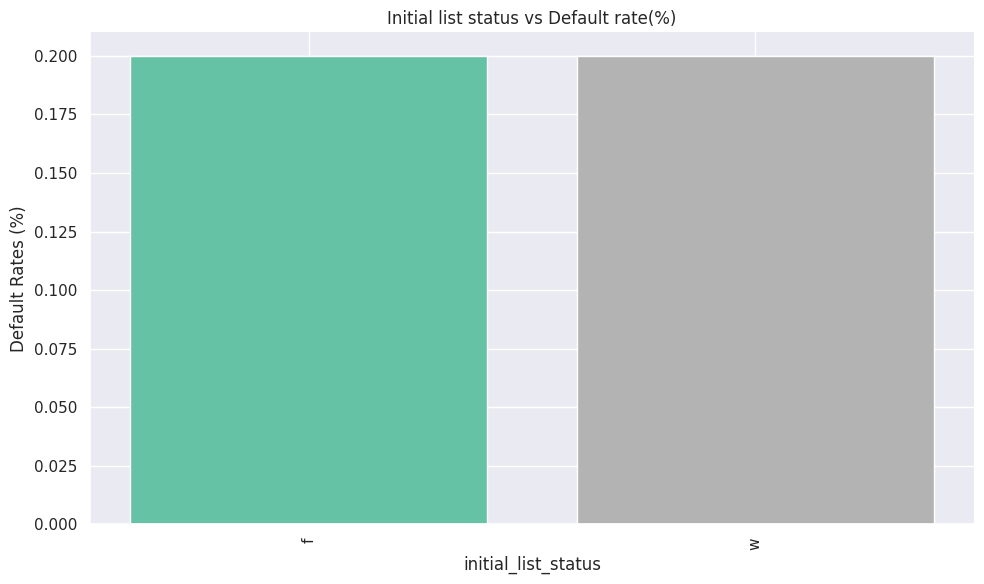

In [96]:
Cat_col_vs_default_rate(loan_data,"initial_list_status",'loan_status',"Initial list status vs Default rate(%)")


- The meaning of the "f" and "w" labels in the revolving line utilization rate is unclear and requires further investigation. It could be specific   coding or labeling conventions used within the dataset, and additional information or documentation may be necessary to determine their exact significance.

### application_type

In [97]:
feature_exploration (loan_data,"application_type",numeric = False)

Description:
count        1345350
unique             2
top       Individual
freq         1319544
Name: application_type, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
              Count  Frequency (%)
Individual  1319544      98.081837
Joint App     25806       1.918163


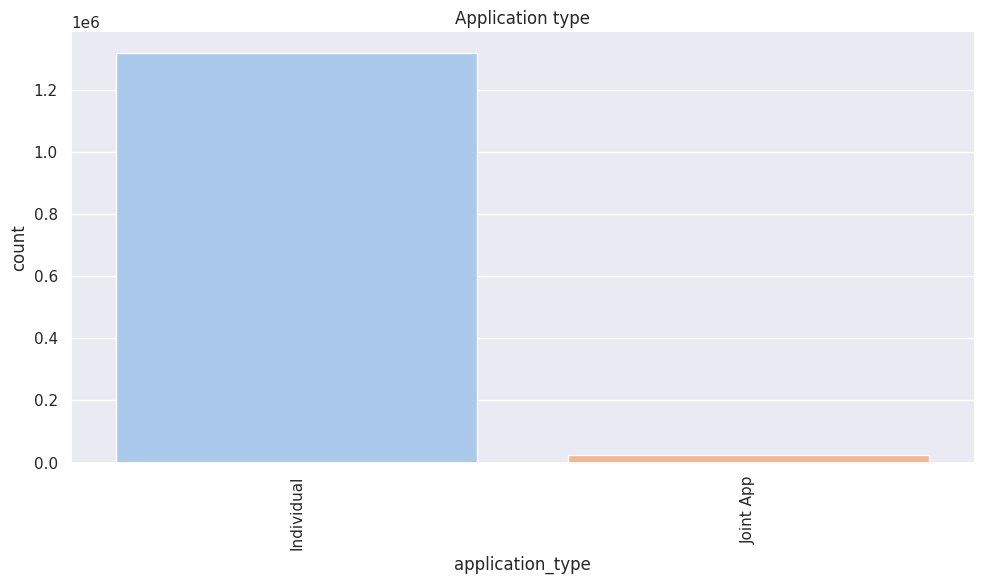

In [98]:
count_plot(loan_data,'application_type','Application type')

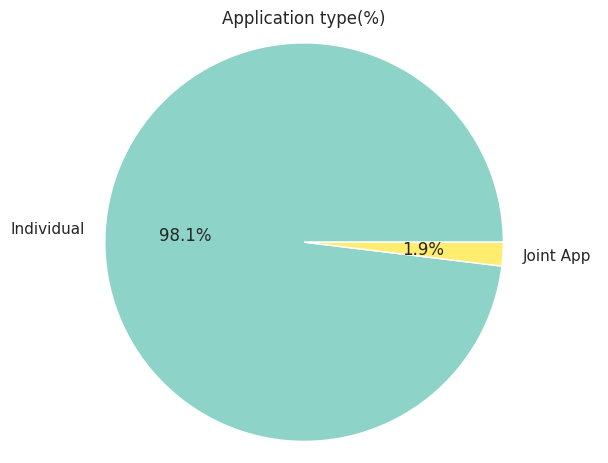

In [99]:
pie_plot(loan_data,'application_type','Application type(%)')

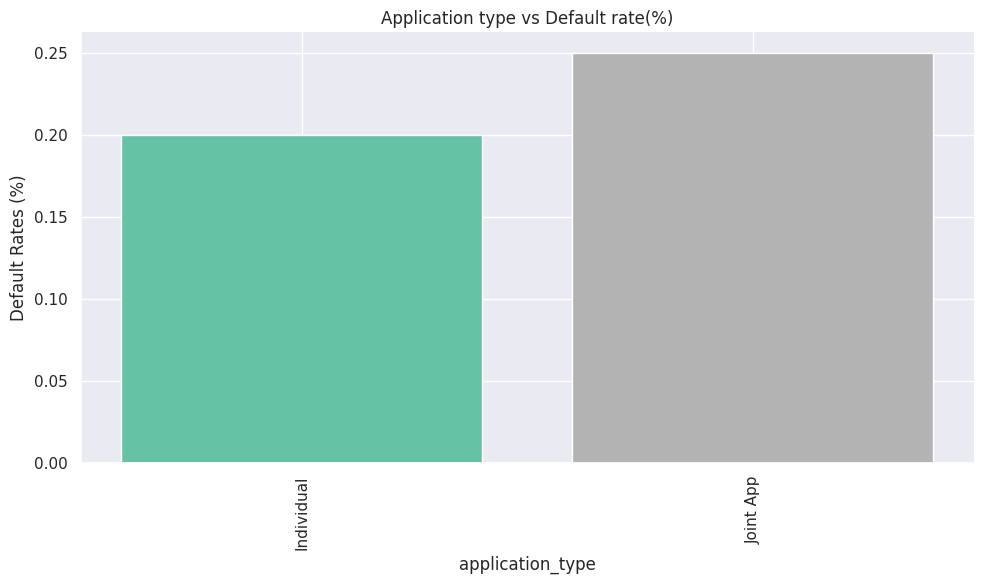

In [100]:
Cat_col_vs_default_rate (loan_data,'application_type','loan_status','Application type vs Default rate(%)')

- The majority of applicants in the dataset have an individual application status, indicating that most loans are applied for by individuals rather than jointly.
- Interestingly, borrowers who applied jointly, likely with a co-applicant or co-signer, have a lower default rate compared to those with individual applications. This suggests that having a joint applicant may provide added financial stability and accountability, resulting in a lower likelihood of defaulting on loan payments.

### mort_acc


In [101]:
feature_exploration(loan_data,'mort_acc',numeric = True)

Description:
count    1.298069e+06
mean     1.670769e+00
std      2.000441e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64
**************************************************
Object type:float32


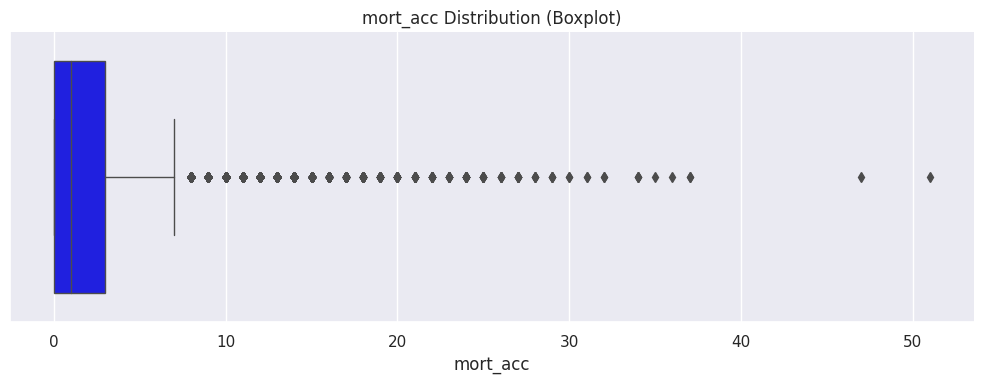

In [102]:
box_plot(loan_data,'mort_acc')

In [103]:
#converting mort account in to binery variable 

def binary_maper(number):
        if number == 0.0:
          return 0
        elif number >= 1.0:
          return 1
        else:
          return number
loan_data['mort_acc'] = loan_data['mort_acc'].apply(binary_maper)    

### pub_rec_bankruptcies

In [104]:
feature_exploration(loan_data,'pub_rec_bankruptcies',numeric = False)

Description:
count    1.344653e+06
mean     1.344444e-01
std      3.779280e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: pub_rec_bankruptcies, dtype: float64
**************************************************
Object type:
float32
**************************************************
Value count:
        Count  Frequency (%)
0.0   1176987      87.530909
1.0    157702      11.728082
2.0      7769       0.577770
3.0      1583       0.117726
4.0       396       0.029450
5.0       141       0.010486
6.0        46       0.003421
7.0        15       0.001116
8.0         9       0.000669
9.0         3       0.000223
11.0        1       0.000074
12.0        1       0.000074


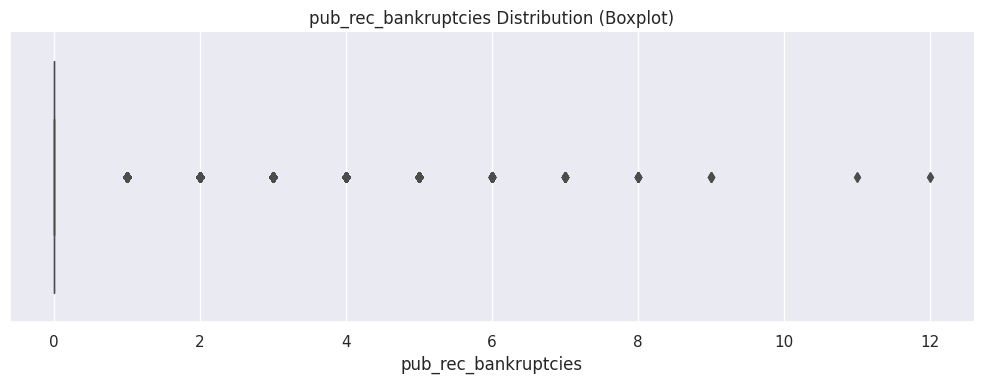

In [105]:
box_plot(loan_data,'pub_rec_bankruptcies')

In [106]:
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].apply(binary_maper)

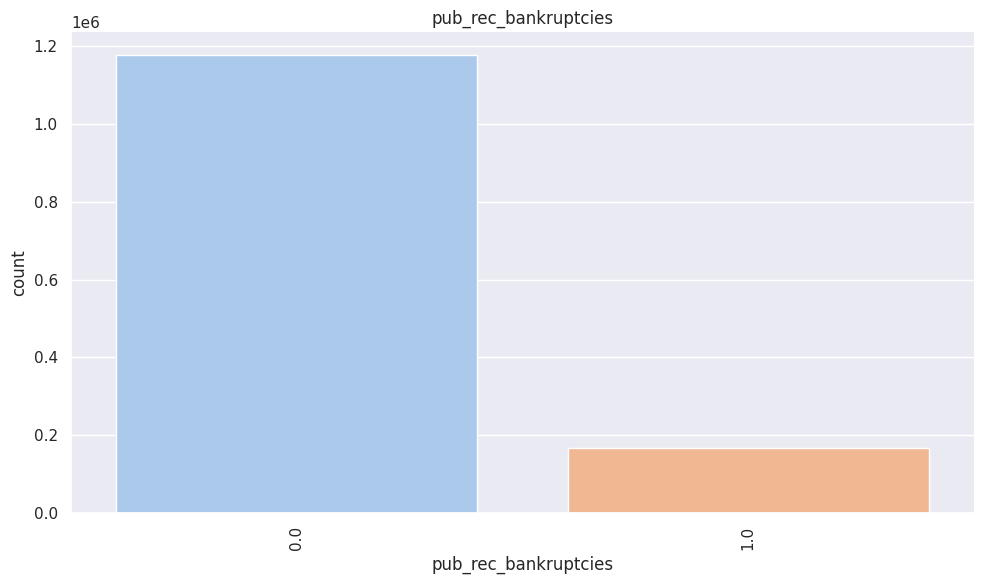

In [107]:
count_plot(loan_data,'pub_rec_bankruptcies','pub_rec_bankruptcies')

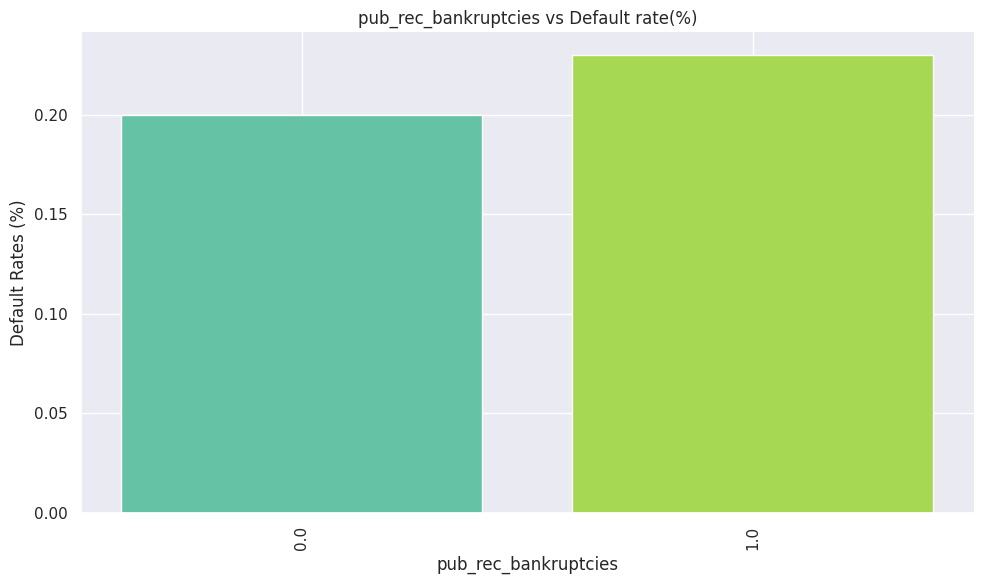

In [108]:
Cat_col_vs_default_rate (loan_data,'pub_rec_bankruptcies','loan_status','pub_rec_bankruptcies vs Default rate(%)')

- By converting the `pub_rec_bankruptcies` variable into a binary variable, with 0 representing no public bankruptcy records and 1 indicating the presence of such records, we can easily compare default rates between these two groups.
- The analysis reveals that applicants with public bankruptcy records have a higher default rate compared to those without such records, suggesting that past bankruptcy filings may be indicative of increased credit risk and potential payment difficulties.


## Bivariate analysis

### Correlation analysis

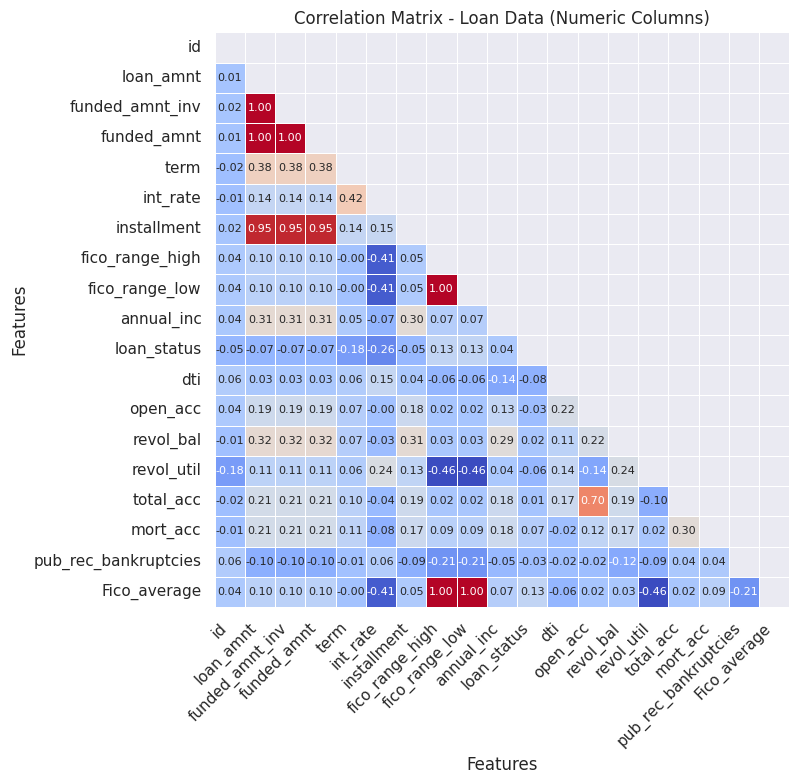

In [109]:
# Select only the numeric columns from the loan_data DataFrame
numeric_columns = loan_data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, cbar=False, square=True, ax=ax, annot_kws={"size": 8})

# Set the title and axis labels
ax.set_title("Correlation Matrix - Loan Data (Numeric Columns)")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Rotate and align the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Fico range is positively co-related to the target variable, indicating that higher Fico range values are associated with a lower default rate. On the other hand, the interest rate (int-rate) is negatively co-related to the target, meaning that higher interest rates are associated with a higher default rate.

- There are no other variables that show a significant co-relation with the target variable. This suggests that the Fico range and interest rate are the most influential factors in predicting loan default.

- The variables loan_amnt, funded_amnt_inv, and funded_amnt are highly co-related to each other. This indicates that these variables provide similar information about the loan amount and funding. It is important to consider this co-relation when analyzing these variables.

- Additionally, the Fico range and revolving line utilization rate (revol_util) are negatively co-related to the interest rate. This implies that borrowers with higher Fico range values and lower revolving line utilization rates are more likely to receive lower interest rates on their loans.

In [110]:
## only using the year from earliest_cr_line
loan_data["earliest_cr_line"] = pd.to_datetime(loan_data["earliest_cr_line"])
loan_data['year'] = loan_data["earliest_cr_line"].dt.year
loan_data['earliest_cr_line'].info()
loan_data["earliest_cr_line"] = pd.to_datetime(loan_data["earliest_cr_line"])
loan_data['year'] = loan_data["earliest_cr_line"].dt.year

<class 'pandas.core.series.Series'>
Int64Index: 1345350 entries, 0 to 2260697
Series name: earliest_cr_line
Non-Null Count    Dtype         
--------------    -----         
1345350 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 20.5 MB


In [111]:
loan_data.year.head()

0    2003
1    1999
2    2000
4    1998
5    1987
Name: year, dtype: int64

In [112]:
cat_cols = loan_data.drop(['issue_d','title','zip_code','earliest_cr_line','addr_state','grade','emp_title'],axis=1).select_dtypes(exclude=np.number).columns.to_list()

In [113]:
loan_data.head()

id  loan_amnt  funded_amnt_inv  funded_amnt  term   int_rate  \
0  68407277     3600.0           3600.0       3600.0     0  13.990000   
1  68355089    24700.0          24700.0      24700.0     0  11.990000   
2  68341763    20000.0          20000.0      20000.0     1  10.780000   
4  68476807    10400.0          10400.0      10400.0     1  22.450001   
5  68426831    11950.0          11950.0      11950.0     0  13.440000   

   installment grade sub_grade             emp_title emp_length  \
0   123.029999     C        C4               leadman         10   
1   820.280029     C        C1              Engineer         10   
2   432.660004     B        B4          truck driver         10   
4   289.910004     F        F1   Contract Specialist          3   
5   405.179993     C        C3  Veterinary Tecnician          4   

   fico_range_high  fico_range_low home_ownership  annual_inc  \
0            679.0           675.0       MORTGAGE     55000.0   
1            719.0           715.0       MORTGAGE     65000.0   
2            699.0           695.0       MORTGAGE     63000.0   
4            699.0           695.0       MORTGAGE    104433.0   
5            694.0           690.0           RENT     34000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Dec-2015            1  debt_consolidation   
1        Not Verified  Dec-2015            1      small_business   
2        Not Verified  Dec-2015            1    home_improvement   
4     Source Verified  Dec-2015            1      major_purchase   
5     Source Verified  Dec-2015            1  debt_consolidation   

                title zip_code addr_state        dti earliest_cr_line  \
0  Debt consolidation    190xx         PA   5.910000       2003-08-01   
1            Business    577xx         SD  16.059999       1999-12-01   
2                 NaN    605xx         IL  10.780000       2000-08-01   
4      Major purchase    174xx         PA  25.370001       1998-06-01   
5  Debt consolidation    300xx         GA  10.200000       1987-10-01   

   open_acc  revol_bal  revol_util  total_acc initial_list_status  \
0       7.0     2765.0   29.700001       13.0                   w   
1      22.0    21470.0   19.200001       38.0                   w   
2       6.0     7869.0   56.200001       18.0                   w   
4      12.0    21929.0   64.500000       35.0                   w   
5       5.0     8822.0   68.400002        6.0                   w   

  application_type  mort_acc  pub_rec_bankruptcies  Fico_average     region  \
0       Individual       1.0                   0.0         677.0  NorthEast   
1       Individual       1.0                   0.0         717.0    MidWest   
2        Joint App       1.0                   0.0         697.0    MidWest   
4       Individual       1.0                   0.0         697.0  NorthEast   
5       Individual       0.0                   0.0         692.0  SouthEast   

   year  
0  2003  
1  1999  
2  2000  
4  1998  
5  1987

## Numerical vs  features (ANOVA)

### Loam amount vs categorical columns

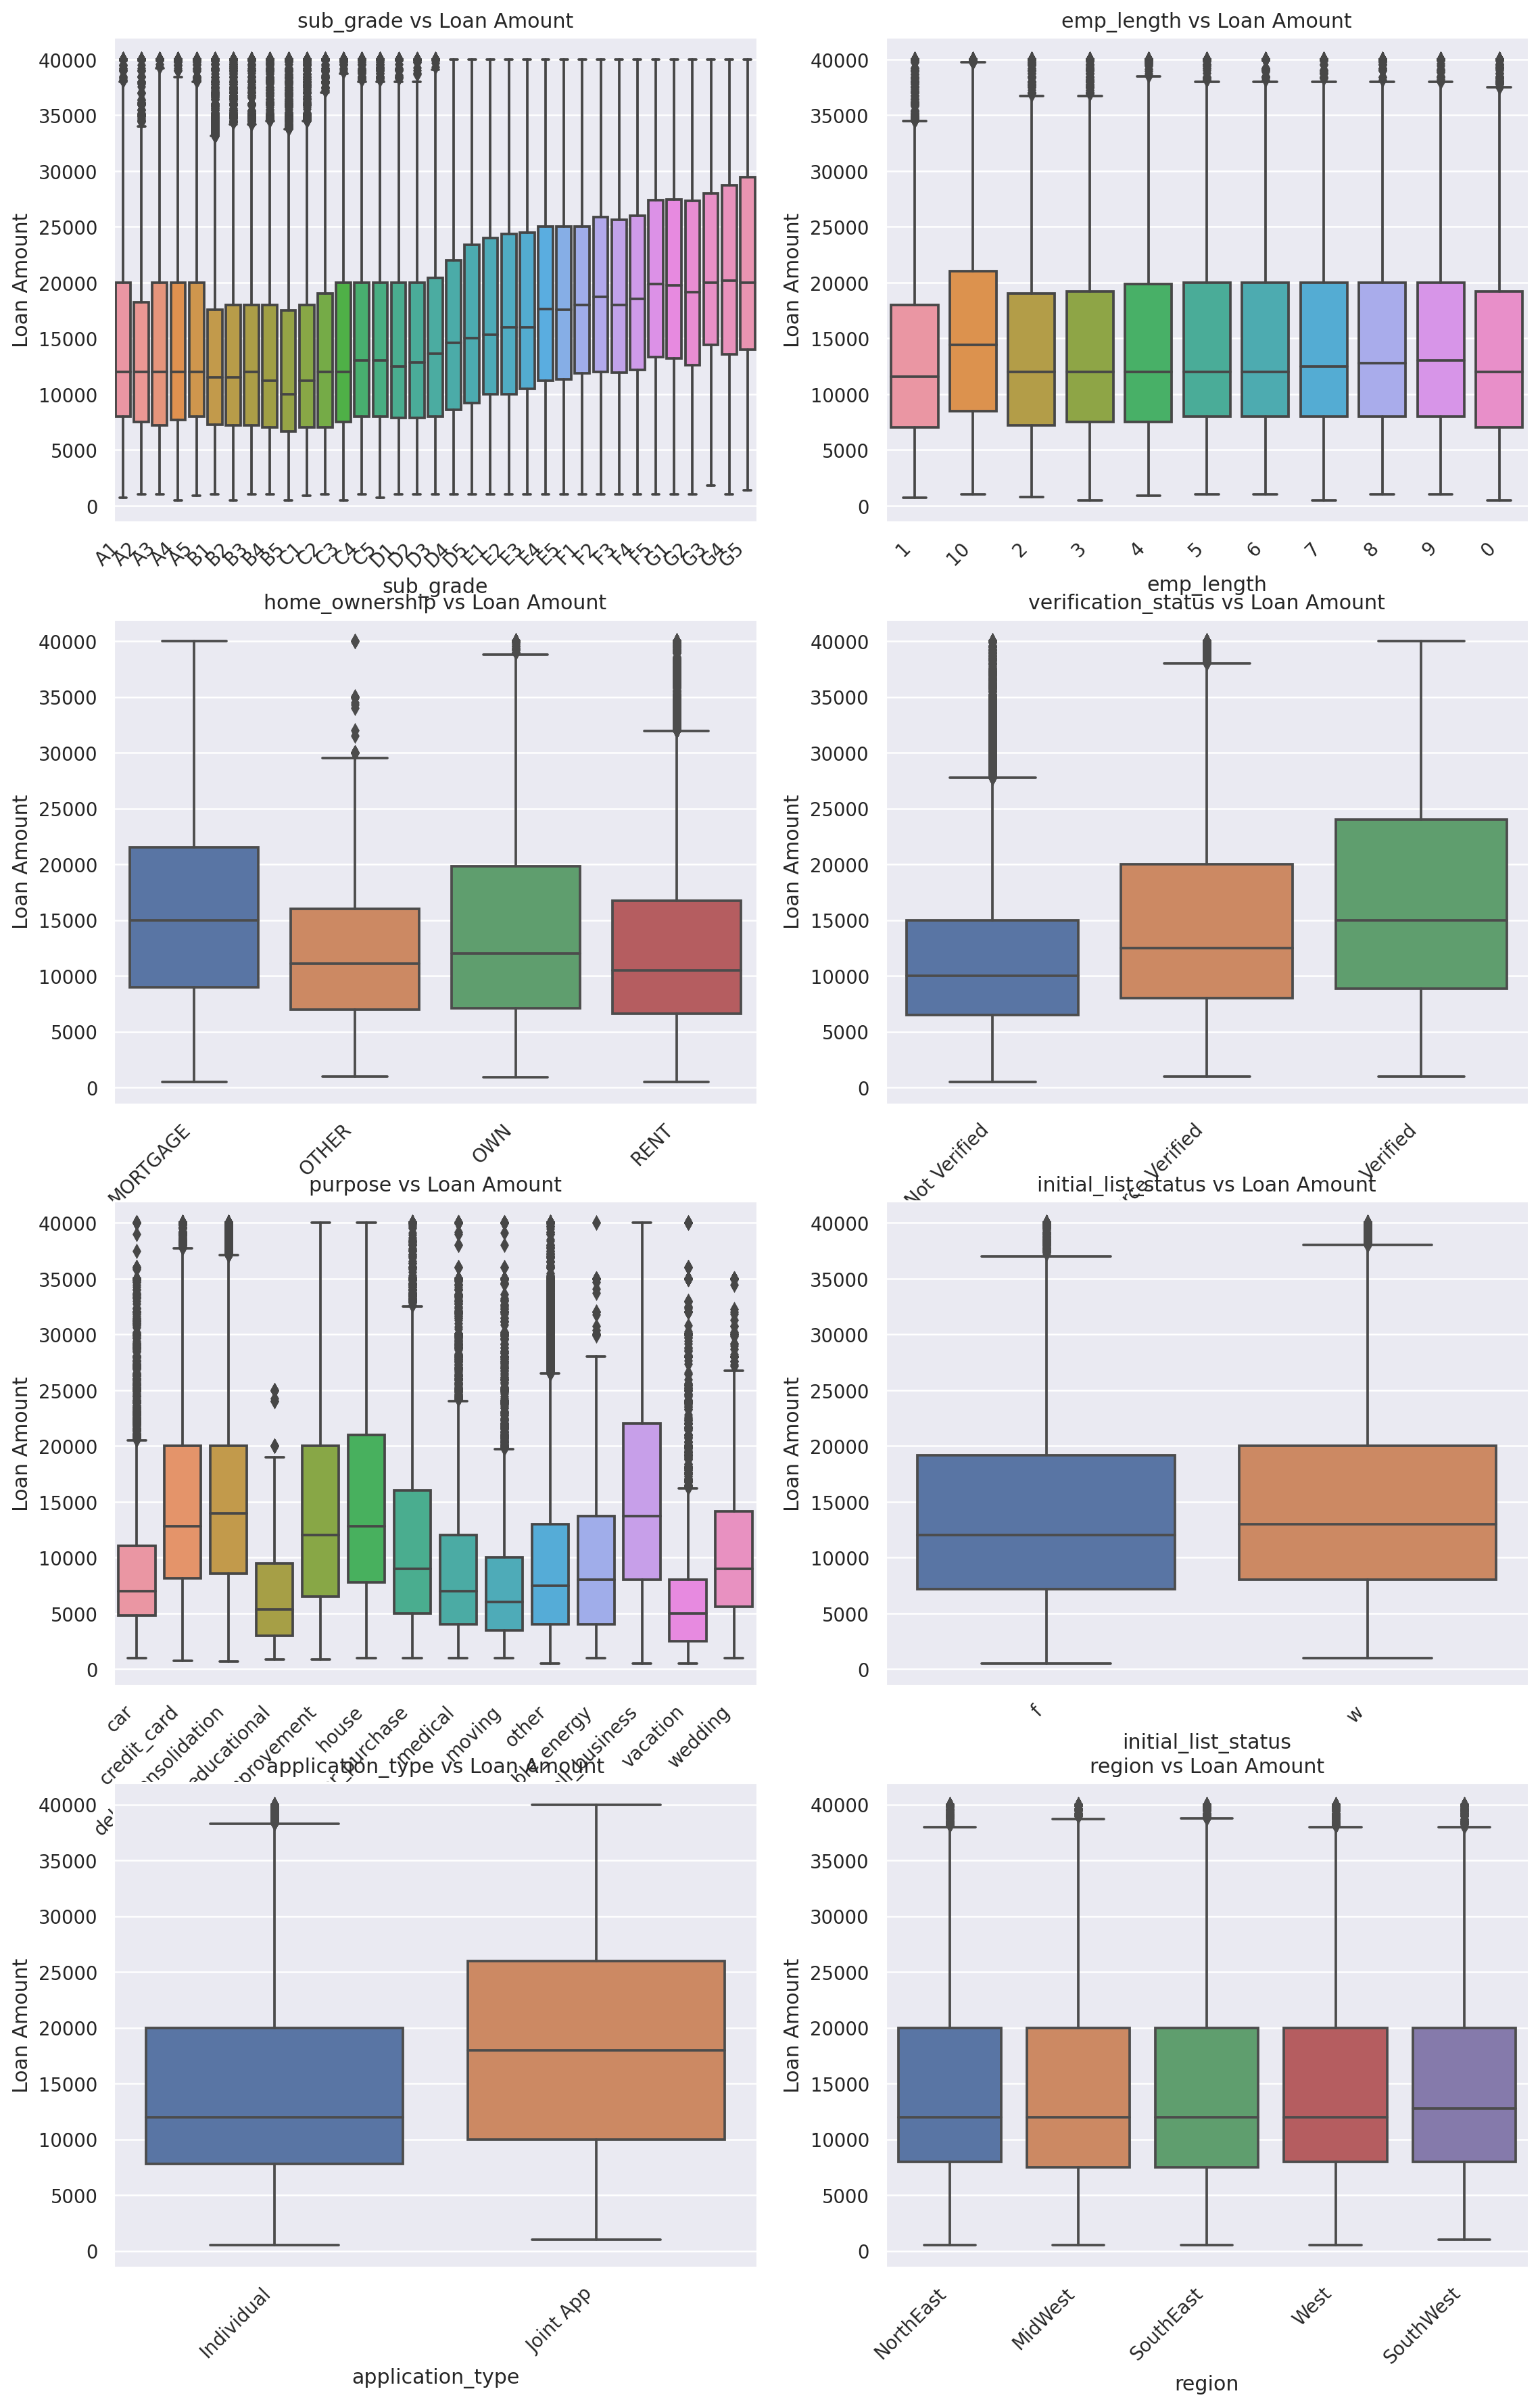

In [114]:
fig = plt.figure(figsize=(15, 30), dpi=180)
fig.tight_layout()

for n, cat_feat in enumerate(cat_cols):
    ax = plt.subplot(5, 2, n+1)
    sns.boxplot(ax=ax, x=loan_data[cat_feat], y=loan_data['loan_amnt'])
    ax.set_title(cat_feat + " vs Loan Amount")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Loan Amount')

plt.show()

- The average loan amount for loan grades E, F, and G is higher compared to grades A, B, C, and D. This suggests that higher-risk loan grades tend to have higher loan amounts.

- The employment length has a similar mean across all loan grades. This indicates that the length of employment does not significantly impact the loan grade or amount.

 - Loans that are verified and sourced verified have a higher mean compared to loans that are not verified. This implies that verified loans or loans with verified sources tend to have higher loan amounts.

### Annual Income vs categorical columns

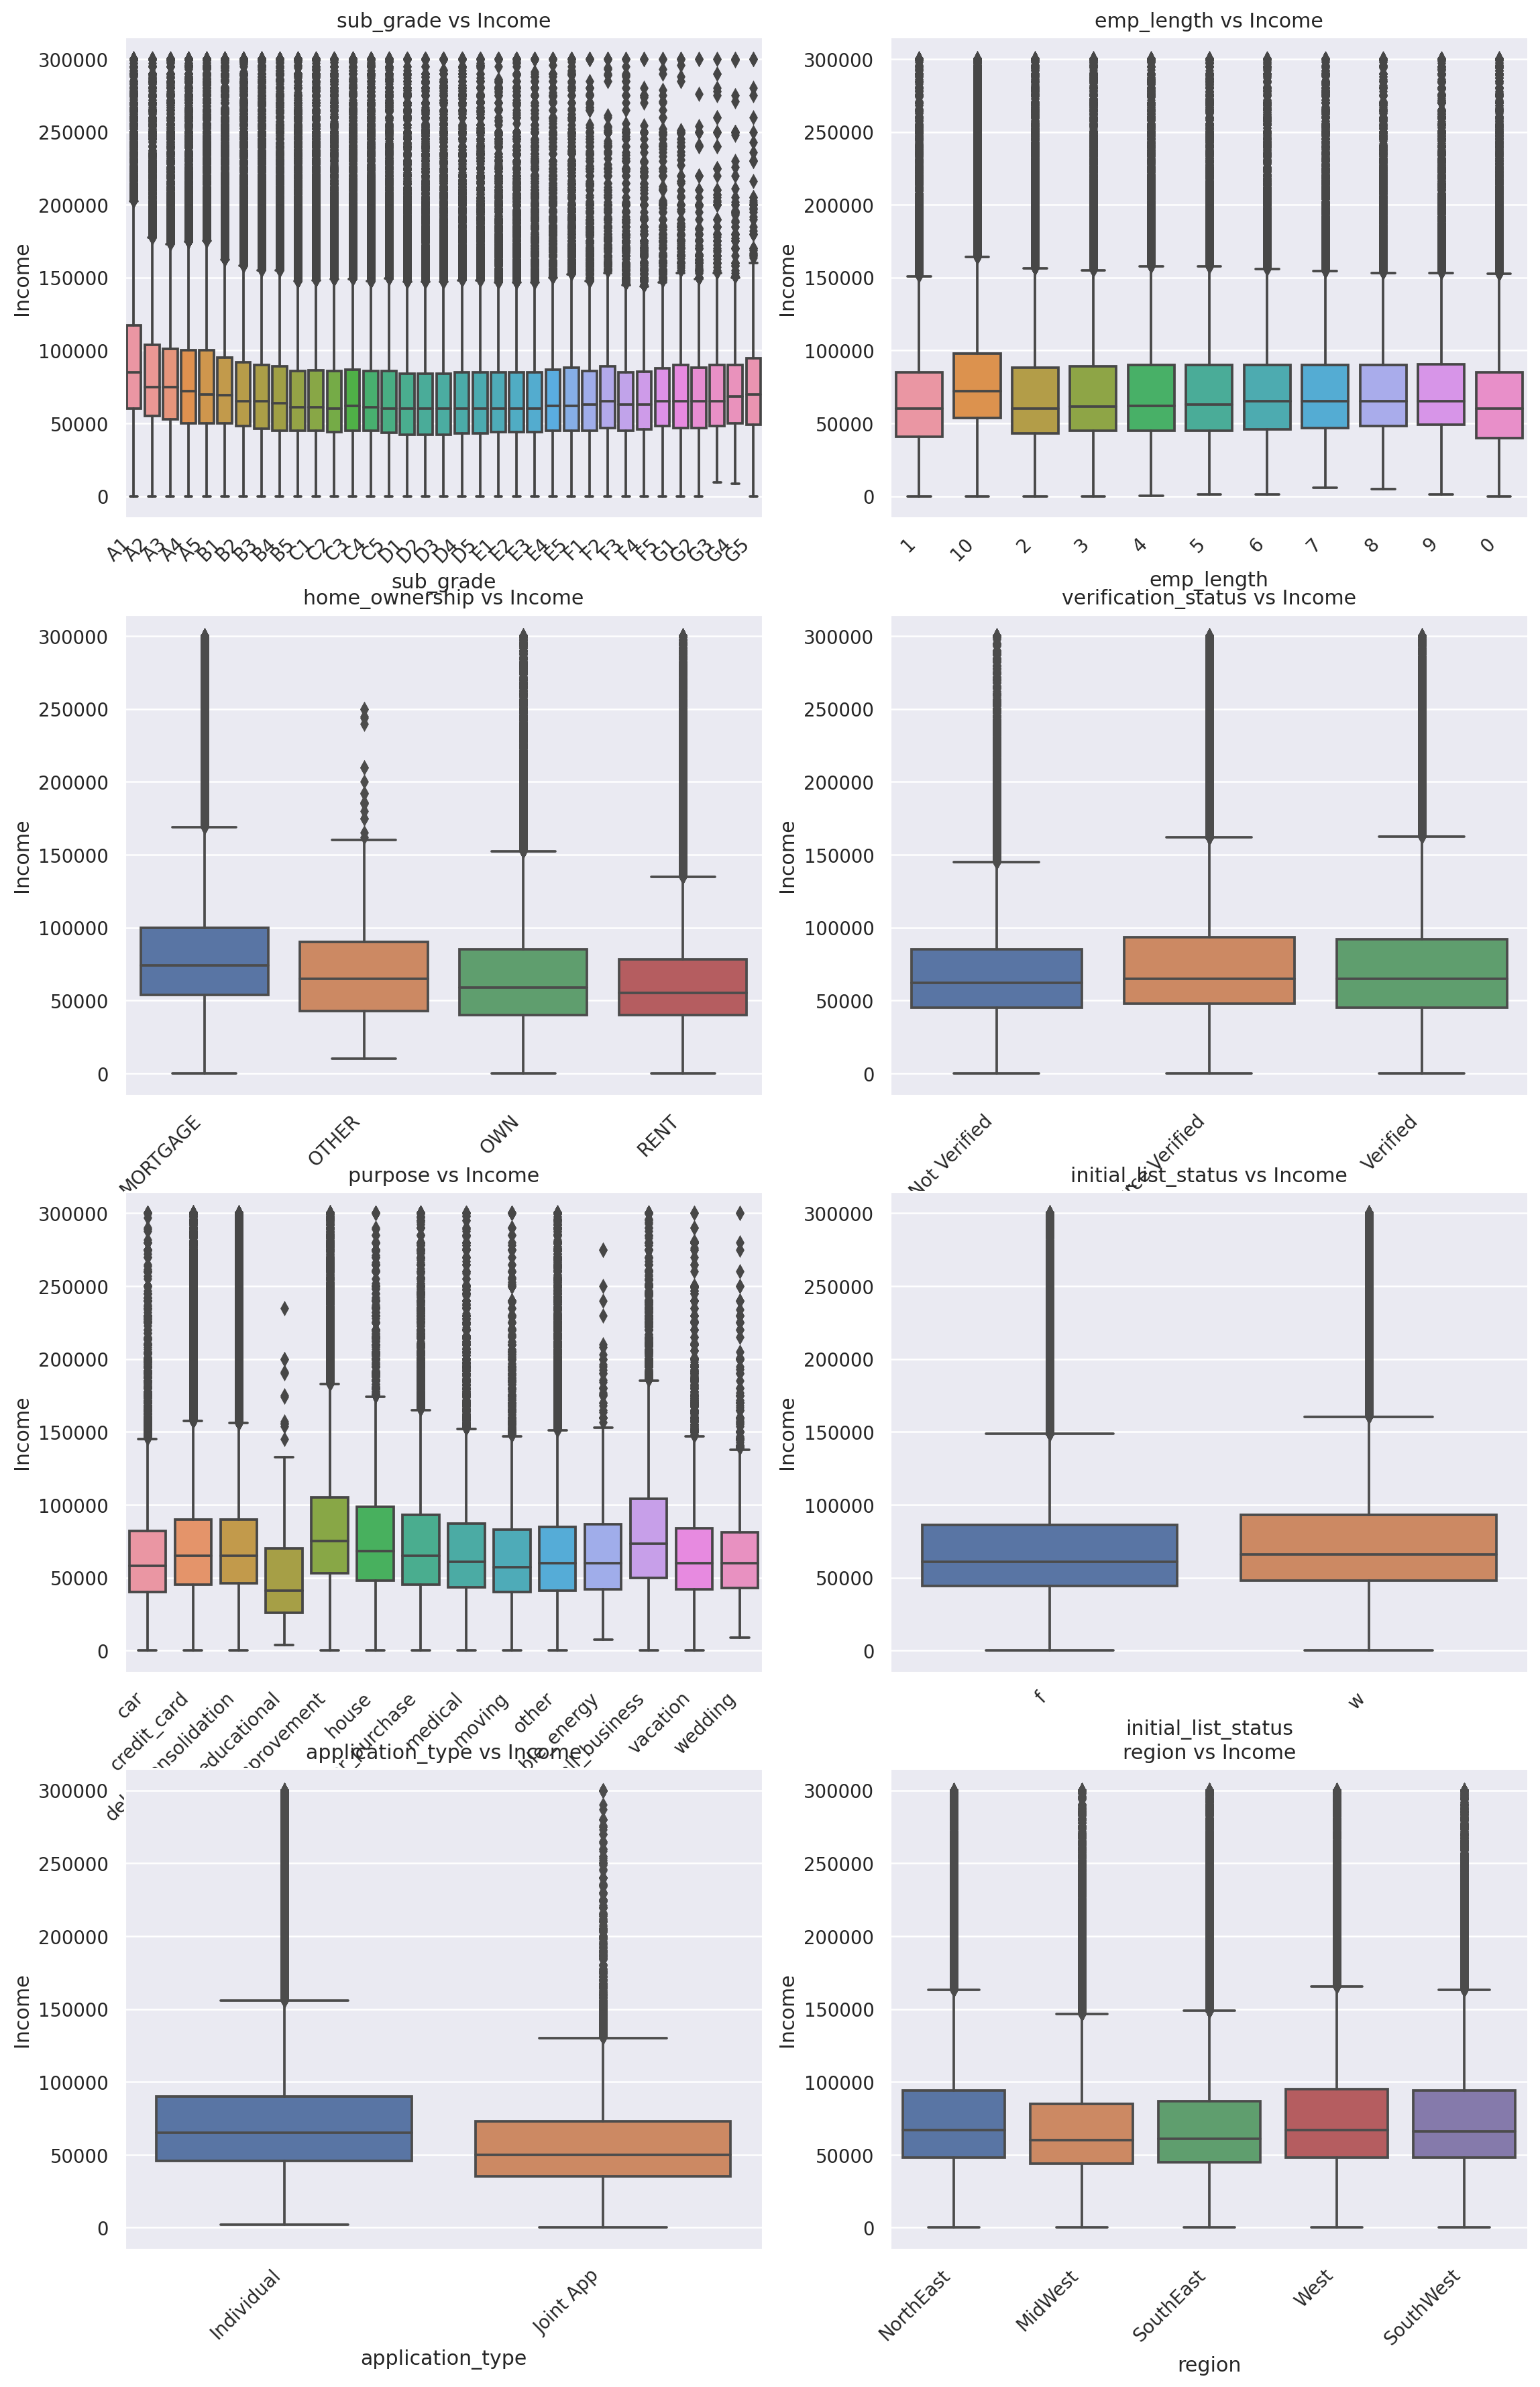

In [115]:
fig = plt.figure(figsize=(15,30),dpi=180)
fig.tight_layout()
for n, cat_feat in enumerate(cat_cols) :
    ax = plt.subplot(5, 2,n+1)
    sns.boxplot(ax=ax,x=loan_data[cat_feat],y=loan_data['annual_inc'][loan_data['annual_inc'] <= 300000])
    ax.set_title(cat_feat + " vs Income")
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Income')

- One notable finding is that higher income is associated with better loan grades. Borrowers with higher income levels tend to have better creditworthiness, resulting in improved loan grades. This indicates that income plays a significant role in determining loan eligibility and terms.

- Another interesting observation is that individuals with higher income are more likely to have mortgage loans. This suggests that borrowers with higher income levels are more inclined to invest in real estate or have the financial capacity to afford mortgage payments.

- Additionally, the analysis reveals that individuals, as opposed to joint applicants, have a higher average income. This implies that individual borrowers generally have higher personal income levels compared to borrowers who apply for loans jointly with another person.

- These insights highlight the importance of income in the loan application process. Lenders often consider income as a crucial factor when assessing an applicant's ability to repay the loan. Higher income levels are generally associated with lower credit risk and increased likelihood of loan approval.

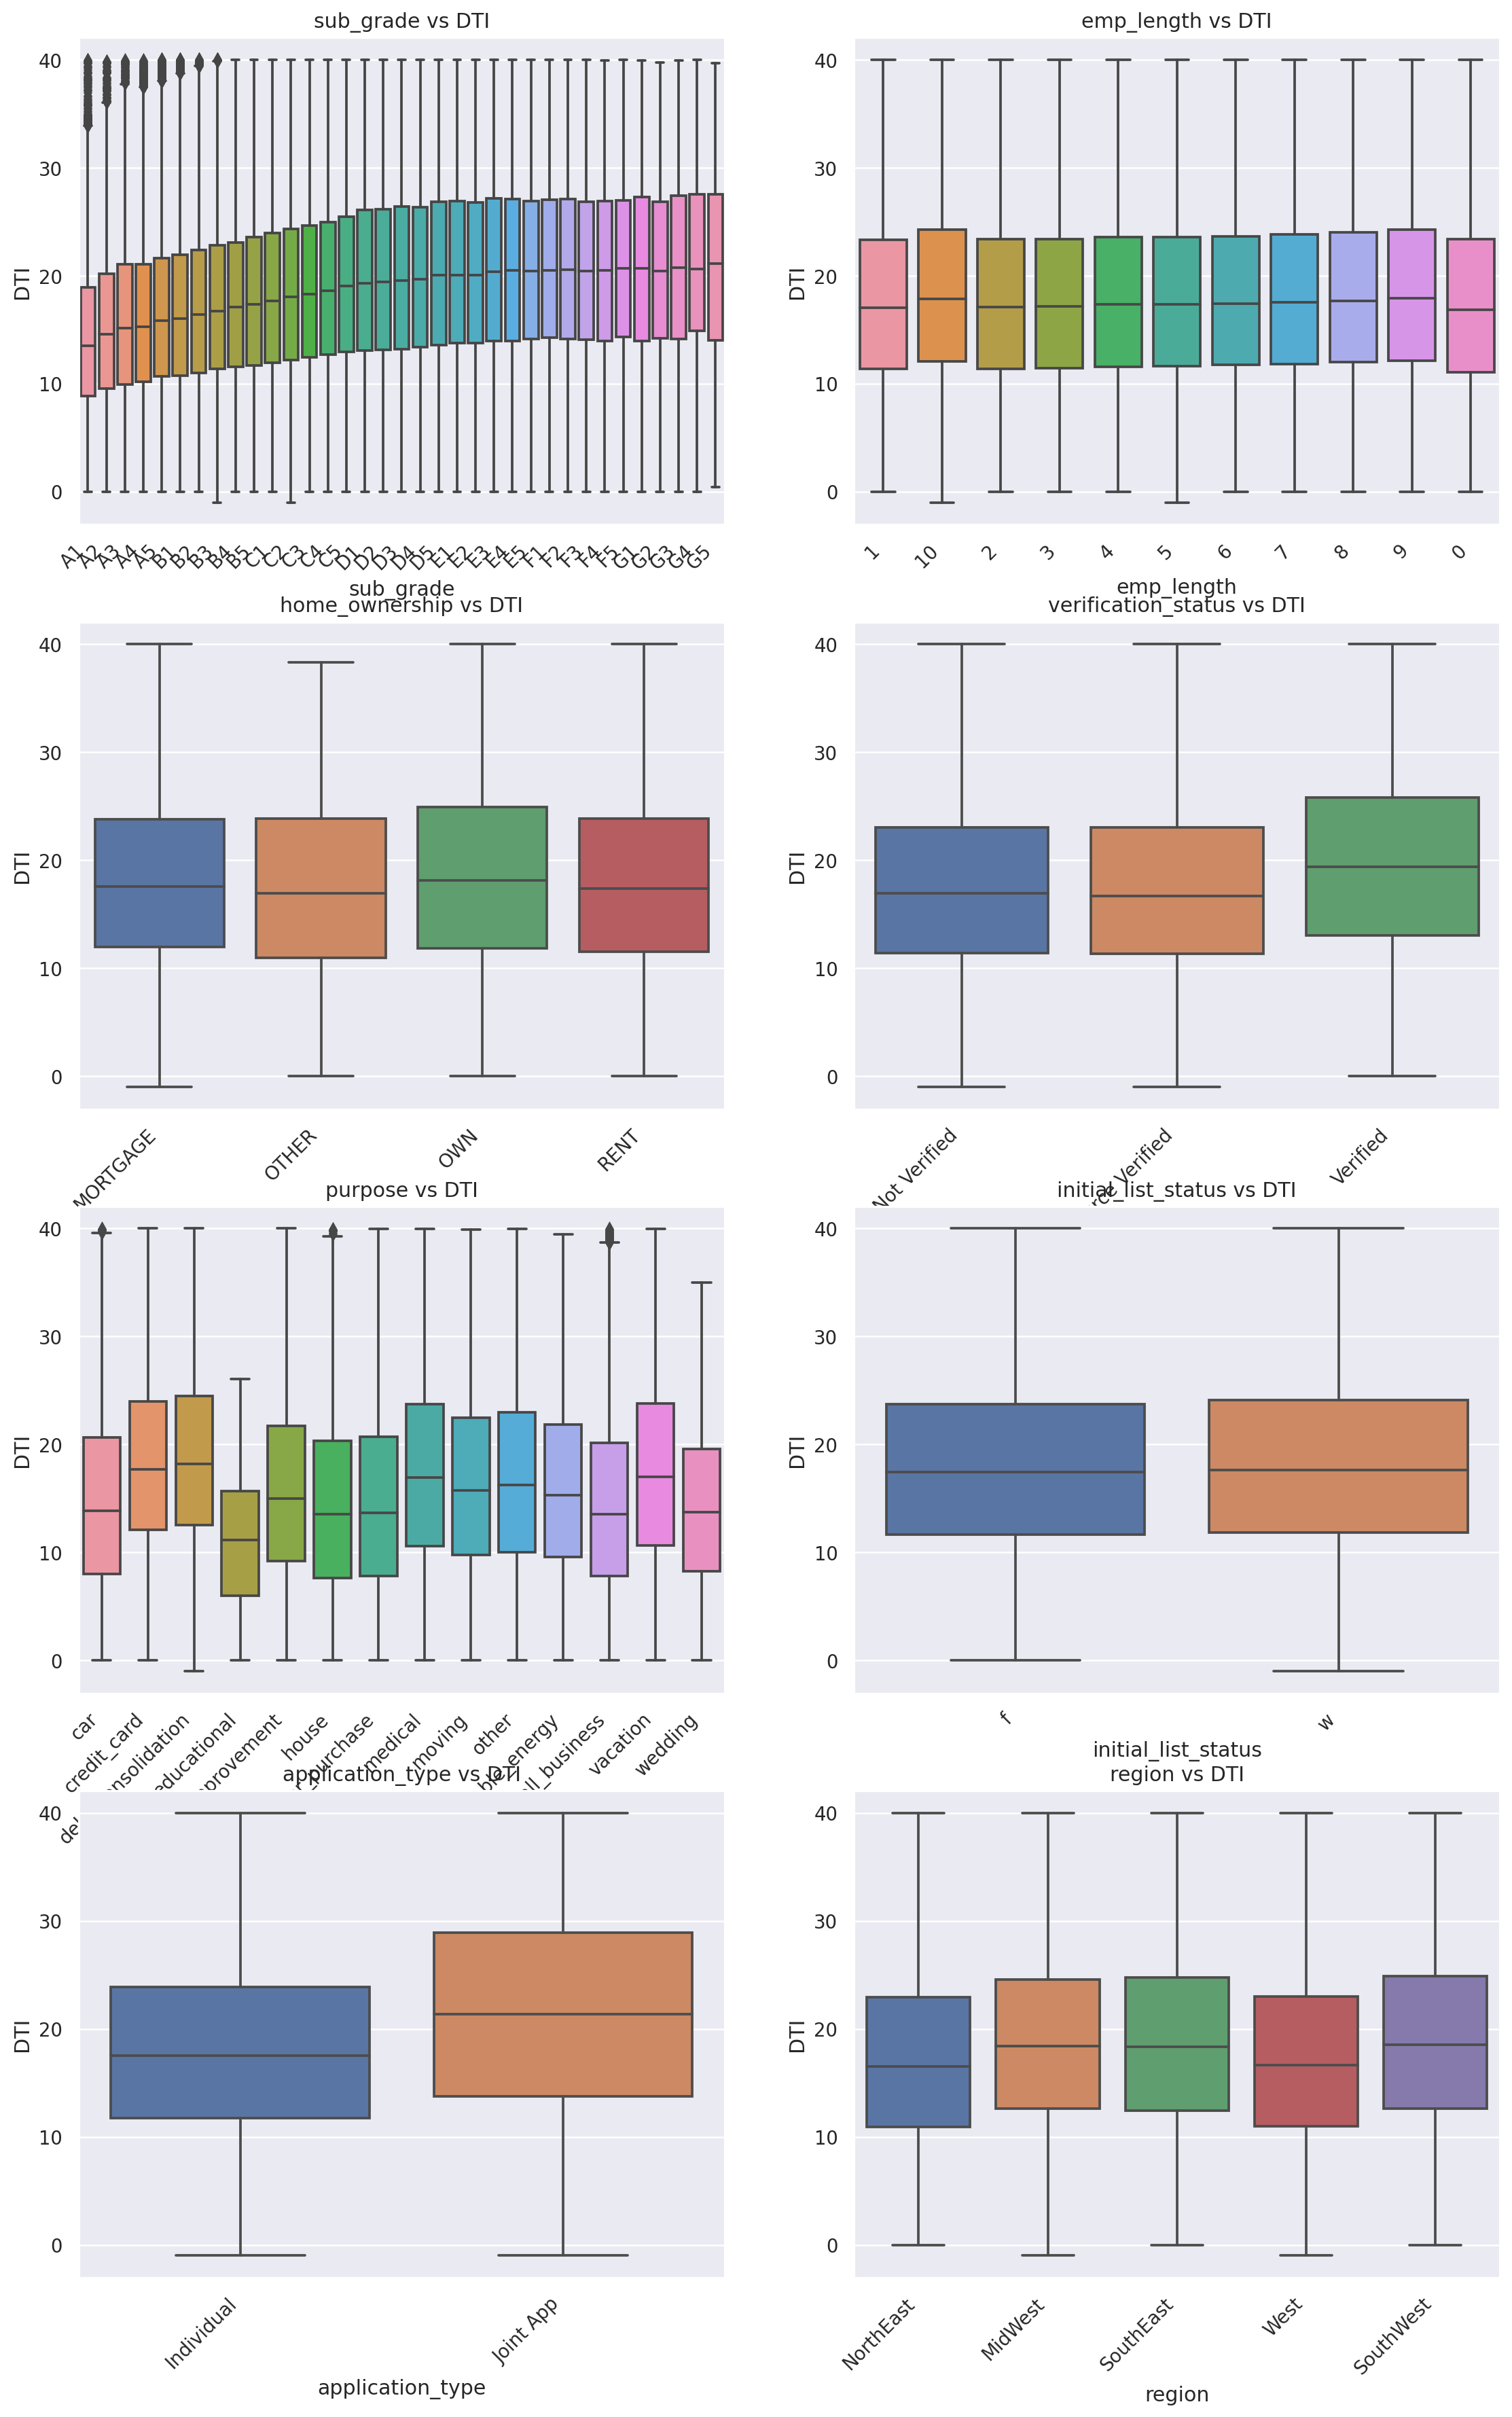

In [116]:
fig = plt.figure(figsize=(15,30),dpi=180)
fig.tight_layout()
for n, cat_feat in enumerate(cat_cols) :
    ax = plt.subplot(5, 2,n+1)
    sns.boxplot(ax=ax,x=loan_data[cat_feat],y=loan_data['dti'][loan_data['dti']<= 40])
    ax.set_title(cat_feat + " vs DTI")
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('DTI')


- The analysis reveals that loan grades tend to decrease as the debt-to-income ratio (DTI) increases. This indicates that borrowers with higher DTI, reflecting a larger proportion of debt compared to their income, are more likely to have lower loan grades. Lenders consider DTI as an important factor in assessing an applicant's creditworthiness and loan repayment capacity.

- Another interesting finding is that the Northeast and West regions of the US generally have lower DTI compared to the Midwest, Southeast, and Southwest regions. This suggests that borrowers residing in the Northeast and West regions tend to have a better balance between their debt and income, resulting in lower DTI ratios. On the other hand, borrowers in the Midwest, Southeast, and Southwest regions may have relatively higher DTI ratios, indicating a higher proportion of debt compared to their income.

- Furthermore, joint applicants typically have higher DTI compared to individual applicants. This indicates that borrowers who apply for loans jointly with another person tend to have a higher debt-to-income ratio. Joint applicants may have combined debts and income, resulting in a higher overall DTI.

- Additionally, loans for education purposes (e.g., student loans) often have lower DTI compared to loans for other purposes. This suggests that borrowers seeking education-related loans generally have a more favorable debt-to-income ratio compared to borrowers seeking loans for other purposes, such as home improvement or debt consolidation.


### FICO Scores

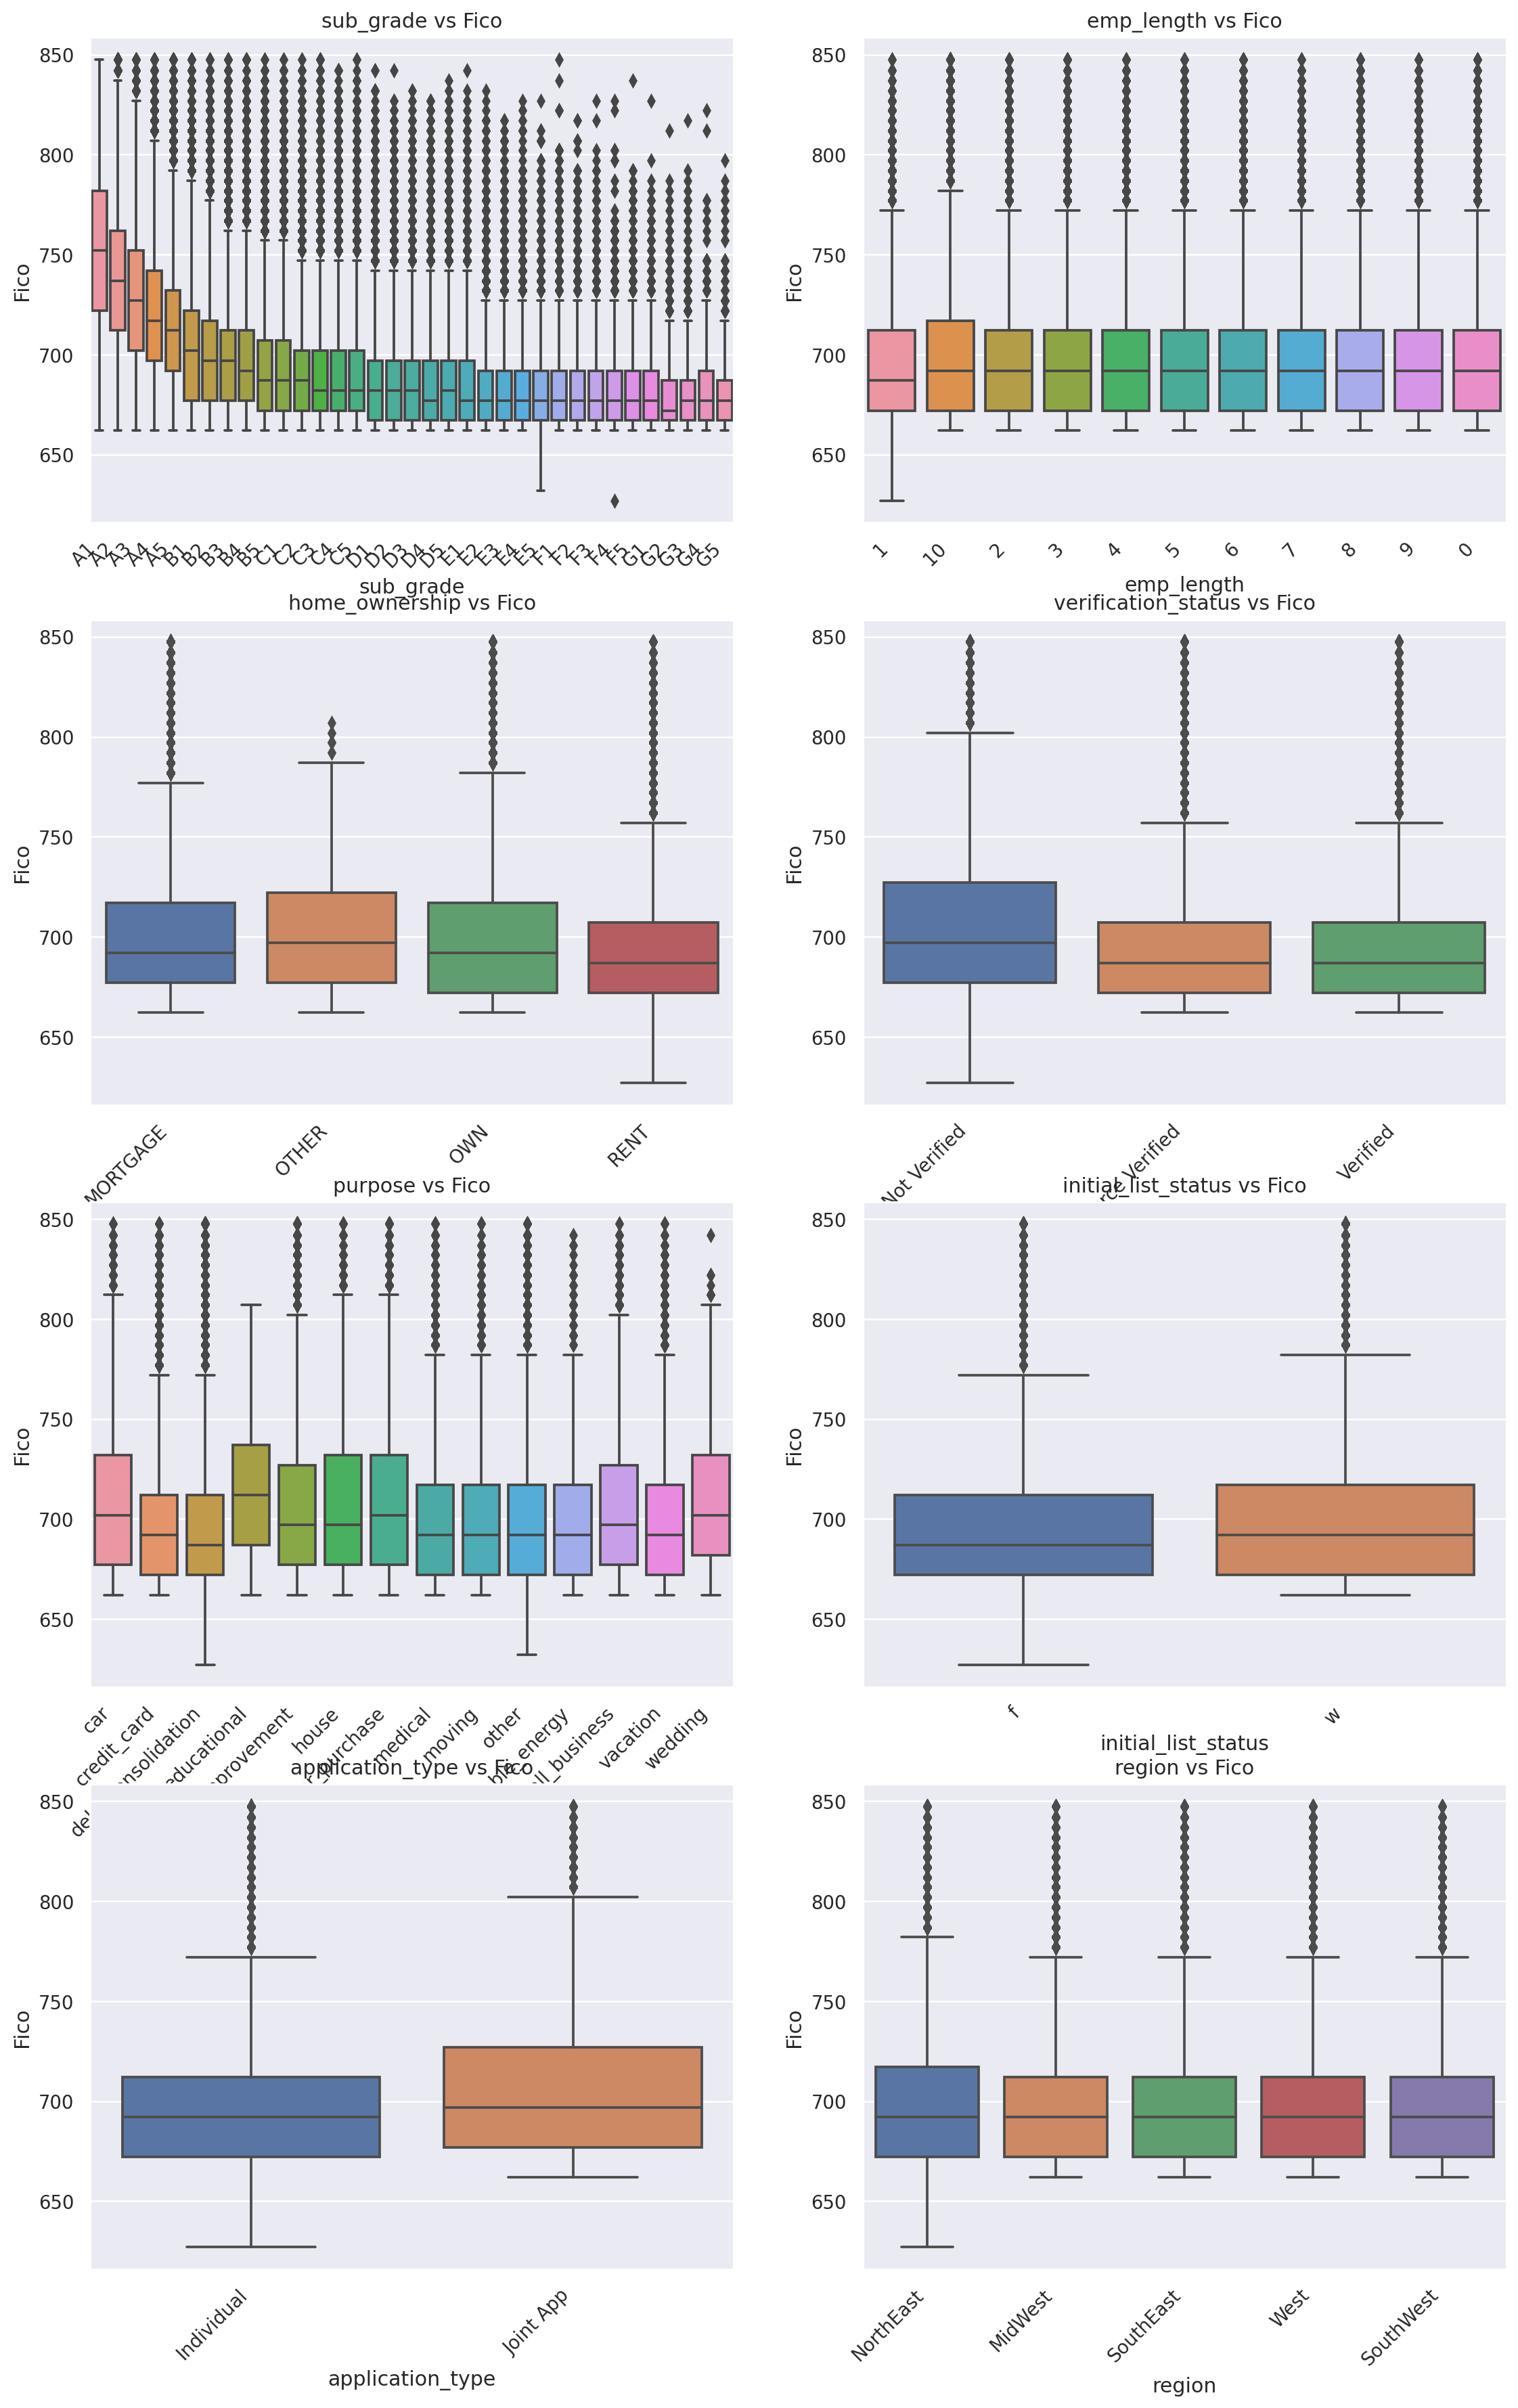

In [117]:
fig = plt.figure(figsize=(15,30),dpi=180)
fig.tight_layout()
for n, cat_feat in enumerate(cat_cols) :
    ax = plt.subplot(5, 2,n+1)
    sns.boxplot(ax=ax,x=loan_data[cat_feat],y=loan_data['Fico_average'])
    ax.set_title(cat_feat + " vs Fico") 
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Fico')

- The analysis reveals a strong positive correlation between FICO scores and loan grades. As FICO scores increase, the loan grades improve, indicating that borrowers with higher creditworthiness are assigned better loan grades.

- The data also suggests that joint applicants have higher FICO scores compared to individuals. This may indicate that joint applicants have stronger financial profiles or higher combined incomes, leading to better creditworthiness.

- Interestingly, loans taken for credit card debt and debt consolidation exhibit lower FICO scores. This could be attributed to the higher risk associated with these types of loans, as borrowers seeking credit card debt or debt consolidation may already have existing financial obligations or higher debt levels.

- It is important to consider these insights when assessing the creditworthiness of borrowers and making lending decisions. Lenders may need to exercise caution when approving loans for individuals with lower FICO scores or for specific loan purposes, such as credit card debt or debt consolidation.

In [118]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    _, p, _, _ = chi2_contingency(contingency_table)
    return p

# Define alpha
alpha = 0.05

# DataFrame to store results
results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'p-value', 'Null Hypothesis'])

# Test all combinations of categorical variables
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        p = chi_square_test(loan_data, cat_cols[i], cat_cols[j])
        if p < alpha:
            hypothesis = 'Rejected (Variables are dependent)'
        else:
            hypothesis = 'Failed to reject (Variables are independent)'
        temp_df = pd.DataFrame({
            'Variable 1': [cat_cols[i]],
            'Variable 2': [cat_cols[j]],
            'p-value': [p],
            'Null Hypothesis': [hypothesis]
        })
        results = pd.concat([results, temp_df], ignore_index=True)
        
results

Variable 1           Variable 2        p-value  \
0             sub_grade           emp_length   5.614592e-38   
1             sub_grade       home_ownership   0.000000e+00   
2             sub_grade  verification_status   0.000000e+00   
3             sub_grade              purpose   0.000000e+00   
4             sub_grade  initial_list_status   0.000000e+00   
5             sub_grade     application_type  6.476641e-295   
6             sub_grade               region   1.281627e-48   
7            emp_length       home_ownership   0.000000e+00   
8            emp_length  verification_status   0.000000e+00   
9            emp_length              purpose   0.000000e+00   
10           emp_length  initial_list_status  2.307473e-282   
11           emp_length     application_type   0.000000e+00   
12           emp_length               region  4.413198e-290   
13       home_ownership  verification_status   0.000000e+00   
14       home_ownership              purpose   0.000000e+00   
15       home_ownership  initial_list_status   0.000000e+00   
16       home_ownership     application_type   0.000000e+00   
17       home_ownership               region   0.000000e+00   
18  verification_status              purpose   0.000000e+00   
19  verification_status  initial_list_status   0.000000e+00   
20  verification_status     application_type  3.017542e-269   
21  verification_status               region   3.379206e-55   
22              purpose  initial_list_status   0.000000e+00   
23              purpose     application_type  4.769772e-124   
24              purpose               region   0.000000e+00   
25  initial_list_status     application_type   0.000000e+00   
26  initial_list_status               region   2.646355e-58   
27     application_type               region  6.940750e-120   

                       Null Hypothesis  
0   Rejected (Variables are dependent)  
1   Rejected (Variables are dependent)  
2   Rejected (Variables are dependent)  
3   Rejected (Variables are dependent)  
4   Rejected (Variables are dependent)  
5   Rejected (Variables are dependent)  
6   Rejected (Variables are dependent)  
7   Rejected (Variables are dependent)  
8   Rejected (Variables are dependent)  
9   Rejected (Variables are dependent)  
10  Rejected (Variables are dependent)  
11  Rejected (Variables are dependent)  
12  Rejected (Variables are dependent)  
13  Rejected (Variables are dependent)  
14  Rejected (Variables are dependent)  
15  Rejected (Variables are dependent)  
16  Rejected (Variables are dependent)  
17  Rejected (Variables are dependent)  
18  Rejected (Variables are dependent)  
19  Rejected (Variables are dependent)  
20  Rejected (Variables are dependent)  
21  Rejected (Variables are dependent)  
22  Rejected (Variables are dependent)  
23  Rejected (Variables are dependent)  
24  Rejected (Variables are dependent)  
25  Rejected (Variables are dependent)  
26  Rejected (Variables are dependent)  
27  Rejected (Variables are dependent)

## Insights through Exploratory Data Analysis (EDA)

- 🕒 Age: The fact that the loan applicant is above 30 years old suggests a level of financial maturity and potentially more established financial stability. 

- 👔 Employment: Being employed for more than 10 years indicates a stable work history and a reliable source of income. 

- 💰 Salary: With an annual salary of $75,000, the applicant's income level is relatively high.

- 🏠 Mortgage: The presence of a mortgage suggests that the applicant already has experience managing long-term financial obligations. 

- 📊 FICO Score: With a FICO score of 690, which is considered average or fair, your ML model will likely take this into account as a significant predictor of default probability. 

- 🔄 Loan Purpose: The primary purpose of the loan being debt consolidation indicates the applicant's intention to manage their existing debts more effectively.

- employment lenght does not have much effect on target varaibale.
- 4 people have higher income above 10000000

In [119]:
# Convert DataFrame to CSV
#loan_data.to_csv('loan_update.csv', index=False)

In [120]:
loan_data.describe()

id     loan_amnt  funded_amnt_inv   funded_amnt  \
count  1.345350e+06  1.345350e+06     1.345350e+06  1.345350e+06   
mean   5.634650e+07  1.441997e+04     1.438914e+04  1.441155e+04   
std    3.836175e+07  8.717099e+03     8.715542e+03  8.713166e+03   
min    5.473400e+04  5.000000e+02     0.000000e+00  5.000000e+02   
25%    2.002788e+07  8.000000e+03     7.875000e+03  8.000000e+03   
50%    5.773490e+07  1.200000e+04     1.200000e+04  1.200000e+04   
75%    8.454656e+07  2.000000e+04     2.000000e+04  2.000000e+04   
max    1.456364e+08  4.000000e+04     4.000000e+04  4.000000e+04   

               term      int_rate   installment  fico_range_high  \
count  1.345350e+06  1.345350e+06  1.345350e+06     1.345350e+06   
mean   2.412621e-01  1.323971e+01  4.380755e+02     7.001852e+02   
std    4.278491e-01  4.768782e+00  2.615145e+02     3.185345e+01   
min    0.000000e+00  5.310000e+00  4.930000e+00     6.290000e+02   
25%    0.000000e+00  9.750000e+00  2.484800e+02     6.740000e+02   
50%    0.000000e+00  1.274000e+01  3.754300e+02     6.940000e+02   
75%    0.000000e+00  1.599000e+01  5.807300e+02     7.140000e+02   
max    1.000000e+00  3.099000e+01  1.719830e+03     8.500000e+02   

       fico_range_low    annual_inc   loan_status           dti      open_acc  \
count    1.345350e+06  1.345350e+06  1.345350e+06  1.344976e+06  1.345350e+06   
mean     6.961851e+02  7.624757e+04  8.003501e-01  1.828263e+01  1.159351e+01   
std      3.185280e+01  6.992485e+04  3.997373e-01  1.116041e+01  5.473848e+00   
min      6.250000e+02  0.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00   
25%      6.700000e+02  4.578000e+04  1.000000e+00  1.179000e+01  8.000000e+00   
50%      6.900000e+02  6.500000e+04  1.000000e+00  1.761000e+01  1.100000e+01   
75%      7.100000e+02  9.000000e+04  1.000000e+00  2.406000e+01  1.400000e+01   
max      8.450000e+02  1.099920e+07  1.000000e+00  9.990000e+02  9.000000e+01   

          revol_bal    revol_util     total_acc      mort_acc  \
count  1.345350e+06  1.344493e+06  1.345350e+06  1.298069e+06   
mean   1.624796e+04  5.180978e+01  2.498075e+01  5.964329e-01   
std    2.232791e+04  2.452110e+01  1.199852e+01  4.906128e-01   
min    0.000000e+00  0.000000e+00  2.000000e+00  0.000000e+00   
25%    5.943000e+03  3.340000e+01  1.600000e+01  0.000000e+00   
50%    1.113400e+04  5.220000e+01  2.300000e+01  1.000000e+00   
75%    1.975500e+04  7.070000e+01  3.200000e+01  1.000000e+00   
max    2.904836e+06  8.923000e+02  1.760000e+02  1.000000e+00   

       pub_rec_bankruptcies  Fico_average          year  
count          1.344653e+06  1.345350e+06  1.345350e+06  
mean           1.246909e-01  6.981852e+02  1.998693e+03  
std            3.303682e-01  3.185312e+01  7.608306e+00  
min            0.000000e+00  6.270000e+02  1.934000e+03  
25%            0.000000e+00  6.720000e+02  1.995000e+03  
50%            0.000000e+00  6.920000e+02  2.000000e+03  
75%            0.000000e+00  7.120000e+02  2.004000e+03  
max            1.000000e+00  8.475000e+02  2.015000e+03